In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os, re
from tensorflow import keras
import keras
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics, preprocessing
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.layers import BatchNormalization

In [60]:
train_df = pd.read_csv('mixed_four.csv', sep='\t')
test_df = pd.read_csv('mixed_test.csv', sep='\t')

In [5]:
train_df = shuffle(train_df)

In [6]:
X = train_df[['peak_1', 'peak_2', 'peak_3', 'peak_4', 'peak_5', 'peak_6']]
y = train_df['Space_code']

In [7]:
model = models.Sequential()
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=6))
BatchNormalization()
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
N_iterations = 10
N_folds = 5

# Initialize array to store the scores of each K-fold cross-validation
scores = []

# This loop is what makes it iterated K-fold validation
for i in range(N_iterations):

    skf = StratifiedKFold(n_splits=N_folds, shuffle=True)

    # This loops is traditional K-fold cross validation
    for j, (train_index, test_index) in enumerate(skf.split(X, y), 0):

        train_features = X.iloc[train_index]
        test_features = X.iloc[test_index]

        train_labels = y.iloc[train_index]
        test_labels = y.iloc[test_index]
        
        one_hot_train_labels = to_categorical(train_labels)
        one_hot_test_labels = to_categorical(test_labels)
        
        X_val = train_features[:200]
        partial_X_train = train_features[200:]
        y_val = one_hot_train_labels[:200]
        partial_y_train = one_hot_train_labels[200:]

        model.fit(partial_X_train, partial_y_train, epochs=200, batch_size=50, validation_data=(X_val, y_val))

        scores.append(model.evaluate(test_features, one_hot_test_labels))


Epoch 1/200
12/12 [==============================] - 2s 77ms/step - loss: 2.6499 - accuracy: 0.2506 - val_loss: 2.3039 - val_accuracy: 0.4700
Epoch 2/200
12/12 [==============================] - 0s 17ms/step - loss: 2.3690 - accuracy: 0.3684 - val_loss: 2.0931 - val_accuracy: 0.4400
Epoch 3/200
12/12 [==============================] - 0s 17ms/step - loss: 2.1915 - accuracy: 0.4499 - val_loss: 1.9559 - val_accuracy: 0.4500
Epoch 4/200
12/12 [==============================] - 0s 17ms/step - loss: 2.1270 - accuracy: 0.4074 - val_loss: 1.8747 - val_accuracy: 0.4700
Epoch 5/200
12/12 [==============================] - 0s 18ms/step - loss: 2.0485 - accuracy: 0.4606 - val_loss: 1.7864 - val_accuracy: 0.6350
Epoch 6/200
12/12 [==============================] - 0s 18ms/step - loss: 1.9385 - accuracy: 0.4893 - val_loss: 1.7470 - val_accuracy: 0.4700
Epoch 7/200
12/12 [==============================] - 0s 16ms/step - loss: 1.8556 - accuracy: 0.4934 - val_loss: 1.6833 - val_accuracy: 0.7000
Epoch 

12/12 [==============================] - 0s 15ms/step - loss: 0.7327 - accuracy: 0.8310 - val_loss: 0.9567 - val_accuracy: 0.8250
Epoch 59/200
12/12 [==============================] - 0s 15ms/step - loss: 0.7701 - accuracy: 0.8241 - val_loss: 0.8805 - val_accuracy: 0.8350
Epoch 60/200
12/12 [==============================] - 0s 15ms/step - loss: 0.7217 - accuracy: 0.8397 - val_loss: 0.8804 - val_accuracy: 0.8150
Epoch 61/200
12/12 [==============================] - 0s 15ms/step - loss: 0.6635 - accuracy: 0.8437 - val_loss: 0.9100 - val_accuracy: 0.8200
Epoch 62/200
12/12 [==============================] - 0s 16ms/step - loss: 0.7470 - accuracy: 0.8375 - val_loss: 0.8717 - val_accuracy: 0.8250
Epoch 63/200
12/12 [==============================] - 0s 15ms/step - loss: 0.7427 - accuracy: 0.8249 - val_loss: 0.8943 - val_accuracy: 0.8100
Epoch 64/200
12/12 [==============================] - 0s 16ms/step - loss: 0.7074 - accuracy: 0.8585 - val_loss: 0.8970 - val_accuracy: 0.8350
Epoch 65/200

Epoch 115/200
12/12 [==============================] - 0s 16ms/step - loss: 0.5041 - accuracy: 0.8901 - val_loss: 0.8305 - val_accuracy: 0.8800
Epoch 116/200
12/12 [==============================] - 0s 16ms/step - loss: 0.4954 - accuracy: 0.9068 - val_loss: 0.8262 - val_accuracy: 0.8650
Epoch 117/200
12/12 [==============================] - 0s 15ms/step - loss: 0.4841 - accuracy: 0.8833 - val_loss: 0.9522 - val_accuracy: 0.8300
Epoch 118/200
12/12 [==============================] - 0s 17ms/step - loss: 0.5734 - accuracy: 0.8626 - val_loss: 0.8408 - val_accuracy: 0.8550
Epoch 119/200
12/12 [==============================] - 0s 15ms/step - loss: 0.4868 - accuracy: 0.8955 - val_loss: 0.8243 - val_accuracy: 0.8800
Epoch 120/200
12/12 [==============================] - 0s 15ms/step - loss: 0.5058 - accuracy: 0.8883 - val_loss: 0.7968 - val_accuracy: 0.8700
Epoch 121/200
12/12 [==============================] - 0s 15ms/step - loss: 0.4650 - accuracy: 0.8876 - val_loss: 0.8023 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.4406 - accuracy: 0.9031 - val_loss: 0.7743 - val_accuracy: 0.8750
Epoch 172/200
12/12 [==============================] - 0s 16ms/step - loss: 0.4545 - accuracy: 0.9129 - val_loss: 0.8292 - val_accuracy: 0.8650
Epoch 173/200
12/12 [==============================] - 0s 15ms/step - loss: 0.4137 - accuracy: 0.9234 - val_loss: 0.7939 - val_accuracy: 0.8750
Epoch 174/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3906 - accuracy: 0.9118 - val_loss: 0.7725 - val_accuracy: 0.8750
Epoch 175/200
12/12 [==============================] - 0s 14ms/step - loss: 0.3759 - accuracy: 0.9353 - val_loss: 0.8304 - val_accuracy: 0.8600
Epoch 176/200
12/12 [==============================] - 0s 16ms/step - loss: 0.4322 - accuracy: 0.9033 - val_loss: 0.8566 - val_accuracy: 0.8600
Epoch 177/200
12/12 [==============================] - 0s 17ms/step - loss: 0.3949 - accuracy: 0.9255 - val_loss: 0.8139 - val_accuracy: 0.8700
Epoch 

12/12 [==============================] - 0s 15ms/step - loss: 0.3705 - accuracy: 0.9448 - val_loss: 0.8713 - val_accuracy: 0.8900
Epoch 28/200
12/12 [==============================] - 0s 16ms/step - loss: 0.3551 - accuracy: 0.9379 - val_loss: 0.8206 - val_accuracy: 0.8800
Epoch 29/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3466 - accuracy: 0.9310 - val_loss: 0.8414 - val_accuracy: 0.8800
Epoch 30/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3373 - accuracy: 0.9448 - val_loss: 0.8188 - val_accuracy: 0.8800
Epoch 31/200
12/12 [==============================] - 0s 15ms/step - loss: 0.4056 - accuracy: 0.9103 - val_loss: 0.8278 - val_accuracy: 0.8800
Epoch 32/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3622 - accuracy: 0.9362 - val_loss: 0.8429 - val_accuracy: 0.8800
Epoch 33/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3748 - accuracy: 0.9328 - val_loss: 0.8483 - val_accuracy: 0.8850
Epoch 34/200

12/12 [==============================] - 0s 18ms/step - loss: 0.3101 - accuracy: 0.9483 - val_loss: 0.9269 - val_accuracy: 0.8900
Epoch 85/200
12/12 [==============================] - 0s 16ms/step - loss: 0.3405 - accuracy: 0.9414 - val_loss: 0.8854 - val_accuracy: 0.8800
Epoch 86/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3125 - accuracy: 0.9448 - val_loss: 0.9296 - val_accuracy: 0.8900
Epoch 87/200
12/12 [==============================] - 0s 24ms/step - loss: 0.3565 - accuracy: 0.9345 - val_loss: 0.9777 - val_accuracy: 0.8850
Epoch 88/200
12/12 [==============================] - 0s 17ms/step - loss: 0.3410 - accuracy: 0.9431 - val_loss: 0.9780 - val_accuracy: 0.8850
Epoch 89/200
12/12 [==============================] - 0s 17ms/step - loss: 0.3384 - accuracy: 0.9310 - val_loss: 0.9277 - val_accuracy: 0.8850
Epoch 90/200
12/12 [==============================] - 0s 17ms/step - loss: 0.3722 - accuracy: 0.9328 - val_loss: 0.9353 - val_accuracy: 0.8900
Epoch 91/200

12/12 [==============================] - 0s 15ms/step - loss: 0.2950 - accuracy: 0.9517 - val_loss: 0.9967 - val_accuracy: 0.8950
Epoch 142/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3264 - accuracy: 0.9310 - val_loss: 0.9577 - val_accuracy: 0.8850
Epoch 143/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3166 - accuracy: 0.9397 - val_loss: 0.9523 - val_accuracy: 0.8900
Epoch 144/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3025 - accuracy: 0.9466 - val_loss: 0.9859 - val_accuracy: 0.8900
Epoch 145/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3352 - accuracy: 0.9310 - val_loss: 1.0828 - val_accuracy: 0.8850
Epoch 146/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3472 - accuracy: 0.9310 - val_loss: 0.9748 - val_accuracy: 0.8900
Epoch 147/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2773 - accuracy: 0.9569 - val_loss: 0.9127 - val_accuracy: 0.8900
Epoch 

Epoch 198/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3306 - accuracy: 0.9328 - val_loss: 0.9769 - val_accuracy: 0.8950
Epoch 199/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2628 - accuracy: 0.9621 - val_loss: 1.0090 - val_accuracy: 0.8950
Epoch 200/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4787 - accuracy: 0.9282
Epoch 1/200
12/12 [==============================] - 0s 23ms/step - loss: 0.4111 - accuracy: 0.9293 - val_loss: 0.5997 - val_accuracy: 0.9100
Epoch 2/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3892 - accuracy: 0.9328 - val_loss: 0.5525 - val_accuracy: 0.9200
Epoch 3/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3536 - accuracy: 0.9431 - val_loss: 0.5746 - val_accuracy: 0.9000
Epoch 4/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3386 - accuracy: 0.9379 - val_loss: 0.5853 - val_accuracy: 0.9200
Epoch 5/200
12/12 [==========================

Epoch 55/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2885 - accuracy: 0.9534 - val_loss: 0.5613 - val_accuracy: 0.9150
Epoch 56/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2694 - accuracy: 0.9552 - val_loss: 0.5496 - val_accuracy: 0.9150
Epoch 57/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2853 - accuracy: 0.9500 - val_loss: 0.5426 - val_accuracy: 0.9250
Epoch 58/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2818 - accuracy: 0.9414 - val_loss: 0.5913 - val_accuracy: 0.9050
Epoch 59/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3012 - accuracy: 0.9466 - val_loss: 0.5378 - val_accuracy: 0.9250
Epoch 60/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2759 - accuracy: 0.9534 - val_loss: 0.5917 - val_accuracy: 0.9000
Epoch 61/200
12/12 [==============================] - 0s 15ms/step - loss: 0.3018 - accuracy: 0.9517 - val_loss: 0.5872 - val_accuracy: 0.9100

12/12 [==============================] - 0s 15ms/step - loss: 0.2878 - accuracy: 0.9448 - val_loss: 0.6097 - val_accuracy: 0.9000
Epoch 113/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2591 - accuracy: 0.9534 - val_loss: 0.5677 - val_accuracy: 0.9000
Epoch 114/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2849 - accuracy: 0.9517 - val_loss: 0.5743 - val_accuracy: 0.9200
Epoch 115/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2644 - accuracy: 0.9621 - val_loss: 0.6123 - val_accuracy: 0.9150
Epoch 116/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2548 - accuracy: 0.9655 - val_loss: 0.6036 - val_accuracy: 0.9050
Epoch 117/200
12/12 [==============================] - 0s 18ms/step - loss: 0.2974 - accuracy: 0.9500 - val_loss: 0.5754 - val_accuracy: 0.9150
Epoch 118/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2558 - accuracy: 0.9655 - val_loss: 0.5668 - val_accuracy: 0.9150
Epoch 

Epoch 169/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2404 - accuracy: 0.9638 - val_loss: 0.5208 - val_accuracy: 0.9150
Epoch 170/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2748 - accuracy: 0.9448 - val_loss: 0.5508 - val_accuracy: 0.9050
Epoch 171/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2940 - accuracy: 0.9517 - val_loss: 0.5750 - val_accuracy: 0.9200
Epoch 172/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2750 - accuracy: 0.9603 - val_loss: 0.5598 - val_accuracy: 0.9100
Epoch 173/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2413 - accuracy: 0.9603 - val_loss: 0.5959 - val_accuracy: 0.9150
Epoch 174/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2773 - accuracy: 0.9534 - val_loss: 0.5478 - val_accuracy: 0.9100
Epoch 175/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2480 - accuracy: 0.9690 - val_loss: 0.5598 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.2503 - accuracy: 0.9534 - val_loss: 0.9453 - val_accuracy: 0.9100
Epoch 26/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2476 - accuracy: 0.9621 - val_loss: 0.9922 - val_accuracy: 0.9100
Epoch 27/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2586 - accuracy: 0.9517 - val_loss: 0.9902 - val_accuracy: 0.9150
Epoch 28/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2834 - accuracy: 0.9569 - val_loss: 0.9405 - val_accuracy: 0.8950
Epoch 29/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2367 - accuracy: 0.9569 - val_loss: 0.9413 - val_accuracy: 0.9150
Epoch 30/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2653 - accuracy: 0.9517 - val_loss: 0.9485 - val_accuracy: 0.9050
Epoch 31/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2536 - accuracy: 0.9586 - val_loss: 0.9373 - val_accuracy: 0.9200
Epoch 32/200

12/12 [==============================] - 0s 15ms/step - loss: 0.2417 - accuracy: 0.9638 - val_loss: 1.0273 - val_accuracy: 0.9100
Epoch 82/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2439 - accuracy: 0.9534 - val_loss: 0.9548 - val_accuracy: 0.9050
Epoch 83/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2261 - accuracy: 0.9672 - val_loss: 1.0177 - val_accuracy: 0.9100
Epoch 84/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2008 - accuracy: 0.9724 - val_loss: 1.0021 - val_accuracy: 0.9150
Epoch 85/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2430 - accuracy: 0.9603 - val_loss: 1.0327 - val_accuracy: 0.9250
Epoch 86/200
12/12 [==============================] - 0s 17ms/step - loss: 0.3017 - accuracy: 0.9414 - val_loss: 1.0236 - val_accuracy: 0.9150
Epoch 87/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2574 - accuracy: 0.9569 - val_loss: 0.9737 - val_accuracy: 0.9200
Epoch 88/200

Epoch 138/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2100 - accuracy: 0.9724 - val_loss: 1.0067 - val_accuracy: 0.9200
Epoch 139/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2590 - accuracy: 0.9517 - val_loss: 1.0178 - val_accuracy: 0.9200
Epoch 140/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2097 - accuracy: 0.9707 - val_loss: 0.9838 - val_accuracy: 0.9150
Epoch 141/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2422 - accuracy: 0.9569 - val_loss: 1.0505 - val_accuracy: 0.9150
Epoch 142/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2442 - accuracy: 0.9638 - val_loss: 0.9966 - val_accuracy: 0.9100
Epoch 143/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2147 - accuracy: 0.9724 - val_loss: 0.9840 - val_accuracy: 0.9050
Epoch 144/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2220 - accuracy: 0.9655 - val_loss: 0.9930 - val_accuracy:

12/12 [==============================] - 0s 16ms/step - loss: 0.2167 - accuracy: 0.9776 - val_loss: 1.0475 - val_accuracy: 0.9150
Epoch 195/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1964 - accuracy: 0.9690 - val_loss: 1.0545 - val_accuracy: 0.9150
Epoch 196/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2269 - accuracy: 0.9638 - val_loss: 1.0428 - val_accuracy: 0.9200
Epoch 197/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2469 - accuracy: 0.9569 - val_loss: 1.0343 - val_accuracy: 0.9100
Epoch 198/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2407 - accuracy: 0.9603 - val_loss: 1.0702 - val_accuracy: 0.9000
Epoch 199/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2248 - accuracy: 0.9690 - val_loss: 1.0023 - val_accuracy: 0.9150
Epoch 200/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.9077
Epoch 1/200
12/12 [==============================] 

Epoch 51/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2415 - accuracy: 0.9586 - val_loss: 0.8795 - val_accuracy: 0.9200
Epoch 52/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2284 - accuracy: 0.9638 - val_loss: 0.9647 - val_accuracy: 0.9050
Epoch 53/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2282 - accuracy: 0.9655 - val_loss: 0.9305 - val_accuracy: 0.9150
Epoch 54/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2436 - accuracy: 0.9569 - val_loss: 0.8547 - val_accuracy: 0.9200
Epoch 55/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2330 - accuracy: 0.9552 - val_loss: 0.8873 - val_accuracy: 0.9250
Epoch 56/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2402 - accuracy: 0.9638 - val_loss: 0.9448 - val_accuracy: 0.9200
Epoch 57/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1970 - accuracy: 0.9724 - val_loss: 0.9943 - val_accuracy: 0.9000

12/12 [==============================] - 0s 17ms/step - loss: 0.1994 - accuracy: 0.9690 - val_loss: 1.0342 - val_accuracy: 0.9100
Epoch 109/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2364 - accuracy: 0.9552 - val_loss: 1.0582 - val_accuracy: 0.9100
Epoch 110/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2485 - accuracy: 0.9638 - val_loss: 0.9803 - val_accuracy: 0.9050
Epoch 111/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2053 - accuracy: 0.9707 - val_loss: 1.0025 - val_accuracy: 0.9050
Epoch 112/200
12/12 [==============================] - 0s 25ms/step - loss: 0.2227 - accuracy: 0.9603 - val_loss: 0.9832 - val_accuracy: 0.9000
Epoch 113/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2326 - accuracy: 0.9586 - val_loss: 0.9836 - val_accuracy: 0.9200
Epoch 114/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2333 - accuracy: 0.9569 - val_loss: 1.0285 - val_accuracy: 0.9050
Epoch 

Epoch 165/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2178 - accuracy: 0.9569 - val_loss: 1.0214 - val_accuracy: 0.9100
Epoch 166/200
12/12 [==============================] - 0s 18ms/step - loss: 0.2012 - accuracy: 0.9638 - val_loss: 0.9811 - val_accuracy: 0.9150
Epoch 167/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1943 - accuracy: 0.9793 - val_loss: 1.0070 - val_accuracy: 0.9000
Epoch 168/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2150 - accuracy: 0.9621 - val_loss: 1.0548 - val_accuracy: 0.9100
Epoch 169/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2235 - accuracy: 0.9672 - val_loss: 1.0994 - val_accuracy: 0.9050
Epoch 170/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2163 - accuracy: 0.9672 - val_loss: 1.0074 - val_accuracy: 0.9100
Epoch 171/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2019 - accuracy: 0.9724 - val_loss: 1.0263 - val_accuracy:

12/12 [==============================] - 0s 17ms/step - loss: 0.2150 - accuracy: 0.9638 - val_loss: 0.9387 - val_accuracy: 0.9350
Epoch 22/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2094 - accuracy: 0.9603 - val_loss: 0.9691 - val_accuracy: 0.9150
Epoch 23/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2101 - accuracy: 0.9638 - val_loss: 0.9840 - val_accuracy: 0.9250
Epoch 24/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2145 - accuracy: 0.9672 - val_loss: 1.0083 - val_accuracy: 0.9150
Epoch 25/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2297 - accuracy: 0.9690 - val_loss: 1.0082 - val_accuracy: 0.9200
Epoch 26/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2299 - accuracy: 0.9500 - val_loss: 1.0038 - val_accuracy: 0.9000
Epoch 27/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2148 - accuracy: 0.9724 - val_loss: 0.9895 - val_accuracy: 0.9150
Epoch 28/200

12/12 [==============================] - 0s 15ms/step - loss: 0.2506 - accuracy: 0.9638 - val_loss: 0.9258 - val_accuracy: 0.9200
Epoch 79/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1973 - accuracy: 0.9655 - val_loss: 0.9538 - val_accuracy: 0.9100
Epoch 80/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2017 - accuracy: 0.9690 - val_loss: 0.9709 - val_accuracy: 0.9150
Epoch 81/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2303 - accuracy: 0.9690 - val_loss: 1.0359 - val_accuracy: 0.9100
Epoch 82/200
12/12 [==============================] - 0s 24ms/step - loss: 0.2415 - accuracy: 0.9534 - val_loss: 0.9569 - val_accuracy: 0.9350
Epoch 83/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1964 - accuracy: 0.9707 - val_loss: 0.9993 - val_accuracy: 0.9150
Epoch 84/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1949 - accuracy: 0.9793 - val_loss: 0.9356 - val_accuracy: 0.9300
Epoch 85/200

Epoch 135/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1958 - accuracy: 0.9724 - val_loss: 1.0135 - val_accuracy: 0.9150
Epoch 136/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2071 - accuracy: 0.9655 - val_loss: 1.0707 - val_accuracy: 0.9050
Epoch 137/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1967 - accuracy: 0.9672 - val_loss: 1.0671 - val_accuracy: 0.9050
Epoch 138/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2190 - accuracy: 0.9672 - val_loss: 0.9982 - val_accuracy: 0.9150
Epoch 139/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2211 - accuracy: 0.9690 - val_loss: 0.9634 - val_accuracy: 0.9150
Epoch 140/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2435 - accuracy: 0.9569 - val_loss: 0.9300 - val_accuracy: 0.9300
Epoch 141/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1954 - accuracy: 0.9724 - val_loss: 0.9876 - val_accuracy:

Epoch 192/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1768 - accuracy: 0.9724 - val_loss: 1.0480 - val_accuracy: 0.9050
Epoch 193/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1690 - accuracy: 0.9776 - val_loss: 1.0348 - val_accuracy: 0.9100
Epoch 194/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2089 - accuracy: 0.9655 - val_loss: 1.0131 - val_accuracy: 0.9100
Epoch 195/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1849 - accuracy: 0.9741 - val_loss: 1.0060 - val_accuracy: 0.9200
Epoch 196/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1869 - accuracy: 0.9724 - val_loss: 1.0310 - val_accuracy: 0.9100
Epoch 197/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2216 - accuracy: 0.9707 - val_loss: 1.0686 - val_accuracy: 0.9150
Epoch 198/200
12/12 [==============================] - 0s 14ms/step - loss: 0.2242 - accuracy: 0.9638 - val_loss: 1.0295 - val_accuracy:

Epoch 49/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2114 - accuracy: 0.9741 - val_loss: 1.0613 - val_accuracy: 0.9050
Epoch 50/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2225 - accuracy: 0.9603 - val_loss: 1.0419 - val_accuracy: 0.9150
Epoch 51/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2342 - accuracy: 0.9569 - val_loss: 1.0346 - val_accuracy: 0.9150
Epoch 52/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1906 - accuracy: 0.9690 - val_loss: 1.0590 - val_accuracy: 0.9050
Epoch 53/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1974 - accuracy: 0.9672 - val_loss: 1.0812 - val_accuracy: 0.9000
Epoch 54/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1978 - accuracy: 0.9724 - val_loss: 1.0749 - val_accuracy: 0.9000
Epoch 55/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2283 - accuracy: 0.9638 - val_loss: 1.0371 - val_accuracy: 0.9100

12/12 [==============================] - 0s 15ms/step - loss: 0.1979 - accuracy: 0.9603 - val_loss: 0.9929 - val_accuracy: 0.9050
Epoch 107/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1949 - accuracy: 0.9724 - val_loss: 0.9659 - val_accuracy: 0.9250
Epoch 108/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1898 - accuracy: 0.9724 - val_loss: 0.9339 - val_accuracy: 0.9200
Epoch 109/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2168 - accuracy: 0.9655 - val_loss: 0.9750 - val_accuracy: 0.9150
Epoch 110/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1890 - accuracy: 0.9828 - val_loss: 1.0036 - val_accuracy: 0.9050
Epoch 111/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2281 - accuracy: 0.9552 - val_loss: 0.9840 - val_accuracy: 0.9150
Epoch 112/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2169 - accuracy: 0.9707 - val_loss: 1.0915 - val_accuracy: 0.9050
Epoch 

Epoch 163/200
12/12 [==============================] - 0s 14ms/step - loss: 0.2166 - accuracy: 0.9690 - val_loss: 1.0131 - val_accuracy: 0.9100
Epoch 164/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2037 - accuracy: 0.9690 - val_loss: 0.9594 - val_accuracy: 0.9250
Epoch 165/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2130 - accuracy: 0.9638 - val_loss: 0.9937 - val_accuracy: 0.9150
Epoch 166/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2119 - accuracy: 0.9759 - val_loss: 1.0418 - val_accuracy: 0.9100
Epoch 167/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1849 - accuracy: 0.9741 - val_loss: 1.0403 - val_accuracy: 0.9150
Epoch 168/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1968 - accuracy: 0.9672 - val_loss: 1.0269 - val_accuracy: 0.9050
Epoch 169/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1908 - accuracy: 0.9690 - val_loss: 0.9690 - val_accuracy:

12/12 [==============================] - 0s 16ms/step - loss: 0.1994 - accuracy: 0.9690 - val_loss: 0.6071 - val_accuracy: 0.9300
Epoch 20/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2124 - accuracy: 0.9586 - val_loss: 0.6794 - val_accuracy: 0.9200
Epoch 21/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2107 - accuracy: 0.9672 - val_loss: 0.6095 - val_accuracy: 0.9250
Epoch 22/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2091 - accuracy: 0.9672 - val_loss: 0.6464 - val_accuracy: 0.9250
Epoch 23/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2268 - accuracy: 0.9534 - val_loss: 0.6136 - val_accuracy: 0.9250
Epoch 24/200
12/12 [==============================] - 0s 24ms/step - loss: 0.2356 - accuracy: 0.9672 - val_loss: 0.6721 - val_accuracy: 0.9250
Epoch 25/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1951 - accuracy: 0.9638 - val_loss: 0.6504 - val_accuracy: 0.9200
Epoch 26/200

12/12 [==============================] - 0s 15ms/step - loss: 0.2253 - accuracy: 0.9672 - val_loss: 0.6108 - val_accuracy: 0.9200
Epoch 77/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1739 - accuracy: 0.9741 - val_loss: 0.6734 - val_accuracy: 0.9250
Epoch 78/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1948 - accuracy: 0.9707 - val_loss: 0.6385 - val_accuracy: 0.9200
Epoch 79/200
12/12 [==============================] - ETA: 0s - loss: 0.2104 - accuracy: 0.96 - 0s 15ms/step - loss: 0.2071 - accuracy: 0.9621 - val_loss: 0.6493 - val_accuracy: 0.9100
Epoch 80/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1931 - accuracy: 0.9776 - val_loss: 0.6295 - val_accuracy: 0.9200
Epoch 81/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2140 - accuracy: 0.9690 - val_loss: 0.6175 - val_accuracy: 0.9250
Epoch 82/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2056 - accuracy: 0.9707 - val_loss: 

12/12 [==============================] - 0s 24ms/step - loss: 0.1825 - accuracy: 0.9690 - val_loss: 0.6144 - val_accuracy: 0.9350
Epoch 133/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1924 - accuracy: 0.9759 - val_loss: 0.6098 - val_accuracy: 0.9250
Epoch 134/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2056 - accuracy: 0.9586 - val_loss: 0.6111 - val_accuracy: 0.9250
Epoch 135/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2042 - accuracy: 0.9690 - val_loss: 0.5883 - val_accuracy: 0.9200
Epoch 136/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2133 - accuracy: 0.9655 - val_loss: 0.6371 - val_accuracy: 0.9250
Epoch 137/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1829 - accuracy: 0.9759 - val_loss: 0.5890 - val_accuracy: 0.9300
Epoch 138/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1891 - accuracy: 0.9724 - val_loss: 0.6166 - val_accuracy: 0.9250
Epoch 

Epoch 189/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2065 - accuracy: 0.9569 - val_loss: 0.6557 - val_accuracy: 0.9200
Epoch 190/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2247 - accuracy: 0.9603 - val_loss: 0.6877 - val_accuracy: 0.9250
Epoch 191/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1733 - accuracy: 0.9759 - val_loss: 0.6925 - val_accuracy: 0.9250
Epoch 192/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1987 - accuracy: 0.9741 - val_loss: 0.6452 - val_accuracy: 0.9200
Epoch 193/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1718 - accuracy: 0.9776 - val_loss: 0.6624 - val_accuracy: 0.9150
Epoch 194/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2260 - accuracy: 0.9638 - val_loss: 0.6819 - val_accuracy: 0.9150
Epoch 195/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1701 - accuracy: 0.9776 - val_loss: 0.6662 - val_accuracy:

Epoch 46/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1930 - accuracy: 0.9690 - val_loss: 0.9324 - val_accuracy: 0.8950
Epoch 47/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2087 - accuracy: 0.9655 - val_loss: 1.0360 - val_accuracy: 0.8900
Epoch 48/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1898 - accuracy: 0.9810 - val_loss: 0.9305 - val_accuracy: 0.9050
Epoch 49/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1883 - accuracy: 0.9759 - val_loss: 0.9952 - val_accuracy: 0.8950
Epoch 50/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1722 - accuracy: 0.9776 - val_loss: 0.9901 - val_accuracy: 0.8900
Epoch 51/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1949 - accuracy: 0.9672 - val_loss: 1.0024 - val_accuracy: 0.9050
Epoch 52/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2059 - accuracy: 0.9621 - val_loss: 1.0288 - val_accuracy: 0.8900

12/12 [==============================] - 0s 17ms/step - loss: 0.2108 - accuracy: 0.9655 - val_loss: 0.9255 - val_accuracy: 0.9050
Epoch 104/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2105 - accuracy: 0.9672 - val_loss: 0.9544 - val_accuracy: 0.9050
Epoch 105/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2593 - accuracy: 0.9483 - val_loss: 0.9444 - val_accuracy: 0.9100
Epoch 106/200
12/12 [==============================] - 0s 23ms/step - loss: 0.2182 - accuracy: 0.9690 - val_loss: 0.9288 - val_accuracy: 0.9100
Epoch 107/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2026 - accuracy: 0.9690 - val_loss: 0.9427 - val_accuracy: 0.9000
Epoch 108/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1724 - accuracy: 0.9776 - val_loss: 1.0175 - val_accuracy: 0.9050
Epoch 109/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1935 - accuracy: 0.9759 - val_loss: 0.9979 - val_accuracy: 0.9150
Epoch 

Epoch 160/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2293 - accuracy: 0.9638 - val_loss: 0.9545 - val_accuracy: 0.9000
Epoch 161/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1941 - accuracy: 0.9655 - val_loss: 0.9784 - val_accuracy: 0.8950
Epoch 162/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1627 - accuracy: 0.9793 - val_loss: 0.9842 - val_accuracy: 0.9000
Epoch 163/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1964 - accuracy: 0.9707 - val_loss: 0.9696 - val_accuracy: 0.9100
Epoch 164/200
12/12 [==============================] - 0s 14ms/step - loss: 0.2209 - accuracy: 0.9500 - val_loss: 1.0301 - val_accuracy: 0.9050
Epoch 165/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2657 - accuracy: 0.9603 - val_loss: 1.0019 - val_accuracy: 0.9050
Epoch 166/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1825 - accuracy: 0.9707 - val_loss: 0.9888 - val_accuracy:

Epoch 16/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1981 - accuracy: 0.9621 - val_loss: 1.2657 - val_accuracy: 0.9050
Epoch 17/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1884 - accuracy: 0.9638 - val_loss: 1.3321 - val_accuracy: 0.9000
Epoch 18/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2071 - accuracy: 0.9621 - val_loss: 1.3099 - val_accuracy: 0.9000
Epoch 19/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2036 - accuracy: 0.9724 - val_loss: 1.2062 - val_accuracy: 0.9050
Epoch 20/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1866 - accuracy: 0.9638 - val_loss: 1.1988 - val_accuracy: 0.9050
Epoch 21/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1829 - accuracy: 0.9690 - val_loss: 1.1203 - val_accuracy: 0.9150
Epoch 22/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2269 - accuracy: 0.9552 - val_loss: 1.0586 - val_accuracy: 0.9200

Epoch 73/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1789 - accuracy: 0.9724 - val_loss: 1.2198 - val_accuracy: 0.9200
Epoch 74/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2092 - accuracy: 0.9638 - val_loss: 1.2606 - val_accuracy: 0.8850
Epoch 75/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1648 - accuracy: 0.9759 - val_loss: 1.3442 - val_accuracy: 0.9000
Epoch 76/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1885 - accuracy: 0.9759 - val_loss: 1.2444 - val_accuracy: 0.8950
Epoch 77/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2223 - accuracy: 0.9672 - val_loss: 1.2906 - val_accuracy: 0.8950
Epoch 78/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1883 - accuracy: 0.9672 - val_loss: 1.2106 - val_accuracy: 0.8900
Epoch 79/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1878 - accuracy: 0.9621 - val_loss: 1.2466 - val_accuracy: 0.8950

12/12 [==============================] - 0s 15ms/step - loss: 0.1792 - accuracy: 0.9707 - val_loss: 1.3028 - val_accuracy: 0.8900
Epoch 131/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2058 - accuracy: 0.9655 - val_loss: 1.1870 - val_accuracy: 0.8850
Epoch 132/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1914 - accuracy: 0.9603 - val_loss: 1.1882 - val_accuracy: 0.8900
Epoch 133/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1863 - accuracy: 0.9724 - val_loss: 1.2832 - val_accuracy: 0.8850
Epoch 134/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1849 - accuracy: 0.9690 - val_loss: 1.2194 - val_accuracy: 0.9250
Epoch 135/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2019 - accuracy: 0.9638 - val_loss: 1.1744 - val_accuracy: 0.9050
Epoch 136/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1579 - accuracy: 0.9759 - val_loss: 1.1714 - val_accuracy: 0.8900
Epoch 

Epoch 187/200
12/12 [==============================] - 0s 14ms/step - loss: 0.2133 - accuracy: 0.9655 - val_loss: 1.2870 - val_accuracy: 0.8900
Epoch 188/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1675 - accuracy: 0.9810 - val_loss: 1.1543 - val_accuracy: 0.8900
Epoch 189/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1819 - accuracy: 0.9690 - val_loss: 1.2307 - val_accuracy: 0.8950
Epoch 190/200
12/12 [==============================] - 0s 14ms/step - loss: 0.1988 - accuracy: 0.9603 - val_loss: 1.1956 - val_accuracy: 0.8950
Epoch 191/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1646 - accuracy: 0.9793 - val_loss: 1.2905 - val_accuracy: 0.8900
Epoch 192/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1950 - accuracy: 0.9672 - val_loss: 1.2347 - val_accuracy: 0.8950
Epoch 193/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1934 - accuracy: 0.9690 - val_loss: 1.1696 - val_accuracy:

12/12 [==============================] - 0s 16ms/step - loss: 0.2224 - accuracy: 0.9586 - val_loss: 0.5946 - val_accuracy: 0.9250
Epoch 44/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1711 - accuracy: 0.9741 - val_loss: 0.7157 - val_accuracy: 0.9200
Epoch 45/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1700 - accuracy: 0.9828 - val_loss: 0.6519 - val_accuracy: 0.9150
Epoch 46/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2134 - accuracy: 0.9707 - val_loss: 0.7464 - val_accuracy: 0.9200
Epoch 47/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1977 - accuracy: 0.9741 - val_loss: 0.6772 - val_accuracy: 0.9250
Epoch 48/200
12/12 [==============================] - 0s 22ms/step - loss: 0.2146 - accuracy: 0.9586 - val_loss: 0.6298 - val_accuracy: 0.9100
Epoch 49/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1919 - accuracy: 0.9690 - val_loss: 0.8451 - val_accuracy: 0.9100
Epoch 50/200

12/12 [==============================] - 0s 17ms/step - loss: 0.1742 - accuracy: 0.9776 - val_loss: 0.7047 - val_accuracy: 0.9200
Epoch 101/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2055 - accuracy: 0.9672 - val_loss: 0.6641 - val_accuracy: 0.9350
Epoch 102/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1966 - accuracy: 0.9655 - val_loss: 0.6061 - val_accuracy: 0.9150
Epoch 103/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1938 - accuracy: 0.9741 - val_loss: 0.6737 - val_accuracy: 0.9250
Epoch 104/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2290 - accuracy: 0.9741 - val_loss: 0.7166 - val_accuracy: 0.9200
Epoch 105/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1887 - accuracy: 0.9638 - val_loss: 0.6925 - val_accuracy: 0.9150
Epoch 106/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1709 - accuracy: 0.9793 - val_loss: 0.6961 - val_accuracy: 0.9200
Epoch 

Epoch 157/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1580 - accuracy: 0.9759 - val_loss: 0.6522 - val_accuracy: 0.9200
Epoch 158/200
12/12 [==============================] - 0s 14ms/step - loss: 0.2310 - accuracy: 0.9707 - val_loss: 0.6578 - val_accuracy: 0.9300
Epoch 159/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1888 - accuracy: 0.9672 - val_loss: 0.7494 - val_accuracy: 0.9200
Epoch 160/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1834 - accuracy: 0.9759 - val_loss: 0.7449 - val_accuracy: 0.9300
Epoch 161/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1883 - accuracy: 0.9724 - val_loss: 0.7466 - val_accuracy: 0.9250
Epoch 162/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1630 - accuracy: 0.9776 - val_loss: 0.7273 - val_accuracy: 0.9250
Epoch 163/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1910 - accuracy: 0.9741 - val_loss: 0.6410 - val_accuracy:

12/12 [==============================] - 0s 17ms/step - loss: 0.2017 - accuracy: 0.9707 - val_loss: 1.0710 - val_accuracy: 0.9050
Epoch 14/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1522 - accuracy: 0.9793 - val_loss: 1.0648 - val_accuracy: 0.9000
Epoch 15/200
12/12 [==============================] - 0s 22ms/step - loss: 0.1983 - accuracy: 0.9724 - val_loss: 1.0766 - val_accuracy: 0.8950
Epoch 16/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2271 - accuracy: 0.9621 - val_loss: 1.0799 - val_accuracy: 0.9050
Epoch 17/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1694 - accuracy: 0.9707 - val_loss: 1.1337 - val_accuracy: 0.8950
Epoch 18/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2013 - accuracy: 0.9655 - val_loss: 1.1391 - val_accuracy: 0.8900
Epoch 19/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1673 - accuracy: 0.9690 - val_loss: 1.0874 - val_accuracy: 0.9100
Epoch 20/200

Epoch 70/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1916 - accuracy: 0.9776 - val_loss: 1.1305 - val_accuracy: 0.9000
Epoch 71/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1811 - accuracy: 0.9672 - val_loss: 1.1163 - val_accuracy: 0.9000
Epoch 72/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1892 - accuracy: 0.9690 - val_loss: 1.0894 - val_accuracy: 0.8900
Epoch 73/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2341 - accuracy: 0.9724 - val_loss: 1.1439 - val_accuracy: 0.8850
Epoch 74/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1494 - accuracy: 0.9810 - val_loss: 1.1445 - val_accuracy: 0.8800
Epoch 75/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1487 - accuracy: 0.9879 - val_loss: 1.1418 - val_accuracy: 0.8900
Epoch 76/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2186 - accuracy: 0.9724 - val_loss: 1.2073 - val_accuracy: 0.8800

12/12 [==============================] - 0s 15ms/step - loss: 0.1616 - accuracy: 0.9776 - val_loss: 1.2776 - val_accuracy: 0.8900
Epoch 128/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2302 - accuracy: 0.9621 - val_loss: 1.0948 - val_accuracy: 0.9150
Epoch 129/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1999 - accuracy: 0.9586 - val_loss: 1.1083 - val_accuracy: 0.8950
Epoch 130/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1542 - accuracy: 0.9862 - val_loss: 1.1706 - val_accuracy: 0.8850
Epoch 131/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1703 - accuracy: 0.9776 - val_loss: 1.1842 - val_accuracy: 0.8850
Epoch 132/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2104 - accuracy: 0.9724 - val_loss: 1.1445 - val_accuracy: 0.9000
Epoch 133/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1740 - accuracy: 0.9690 - val_loss: 1.1325 - val_accuracy: 0.9000
Epoch 

Epoch 184/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1787 - accuracy: 0.9759 - val_loss: 1.1651 - val_accuracy: 0.8900
Epoch 185/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1626 - accuracy: 0.9724 - val_loss: 1.1943 - val_accuracy: 0.8850
Epoch 186/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2128 - accuracy: 0.9621 - val_loss: 1.1767 - val_accuracy: 0.8950
Epoch 187/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2010 - accuracy: 0.9759 - val_loss: 1.1184 - val_accuracy: 0.8900
Epoch 188/200
12/12 [==============================] - ETA: 0s - loss: 0.2001 - accuracy: 0.96 - 0s 16ms/step - loss: 0.1951 - accuracy: 0.9690 - val_loss: 1.0983 - val_accuracy: 0.9000
Epoch 189/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2196 - accuracy: 0.9466 - val_loss: 1.1562 - val_accuracy: 0.8950
Epoch 190/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1691 - accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.1847 - accuracy: 0.9621 - val_loss: 1.1590 - val_accuracy: 0.9150
Epoch 41/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2144 - accuracy: 0.9586 - val_loss: 1.0915 - val_accuracy: 0.9050
Epoch 42/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1954 - accuracy: 0.9655 - val_loss: 1.1177 - val_accuracy: 0.9150
Epoch 43/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1761 - accuracy: 0.9724 - val_loss: 1.1372 - val_accuracy: 0.9050
Epoch 44/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1652 - accuracy: 0.9828 - val_loss: 1.1677 - val_accuracy: 0.9100
Epoch 45/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1776 - accuracy: 0.9672 - val_loss: 1.1187 - val_accuracy: 0.9200
Epoch 46/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1909 - accuracy: 0.9672 - val_loss: 1.1207 - val_accuracy: 0.9250
Epoch 47/200

12/12 [==============================] - 0s 20ms/step - loss: 0.1914 - accuracy: 0.9707 - val_loss: 1.1684 - val_accuracy: 0.9100
Epoch 98/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1894 - accuracy: 0.9741 - val_loss: 1.1176 - val_accuracy: 0.9050
Epoch 99/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1829 - accuracy: 0.9707 - val_loss: 1.1637 - val_accuracy: 0.9000
Epoch 100/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1726 - accuracy: 0.9741 - val_loss: 1.1504 - val_accuracy: 0.9000
Epoch 101/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2089 - accuracy: 0.9638 - val_loss: 1.1121 - val_accuracy: 0.9200
Epoch 102/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1779 - accuracy: 0.9672 - val_loss: 1.1861 - val_accuracy: 0.9050
Epoch 103/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2041 - accuracy: 0.9569 - val_loss: 1.1143 - val_accuracy: 0.9150
Epoch 10

12/12 [==============================] - 0s 17ms/step - loss: 0.2379 - accuracy: 0.9586 - val_loss: 1.1766 - val_accuracy: 0.9200
Epoch 154/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1753 - accuracy: 0.9759 - val_loss: 1.1678 - val_accuracy: 0.9150
Epoch 155/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2210 - accuracy: 0.9552 - val_loss: 1.2240 - val_accuracy: 0.9100
Epoch 156/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1797 - accuracy: 0.9741 - val_loss: 1.2136 - val_accuracy: 0.9050
Epoch 157/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2461 - accuracy: 0.9638 - val_loss: 1.1089 - val_accuracy: 0.9200
Epoch 158/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1778 - accuracy: 0.9724 - val_loss: 1.2288 - val_accuracy: 0.9050
Epoch 159/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1935 - accuracy: 0.9672 - val_loss: 1.2411 - val_accuracy: 0.9100
Epoch 

12/12 [==============================] - 0s 15ms/step - loss: 0.2053 - accuracy: 0.9638 - val_loss: 1.1434 - val_accuracy: 0.9100
Epoch 10/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2305 - accuracy: 0.9603 - val_loss: 1.0888 - val_accuracy: 0.9050
Epoch 11/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1810 - accuracy: 0.9655 - val_loss: 1.1350 - val_accuracy: 0.9150
Epoch 12/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2045 - accuracy: 0.9621 - val_loss: 1.2084 - val_accuracy: 0.9100
Epoch 13/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2010 - accuracy: 0.9655 - val_loss: 1.1389 - val_accuracy: 0.9050
Epoch 14/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1669 - accuracy: 0.9707 - val_loss: 1.1165 - val_accuracy: 0.9050
Epoch 15/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1910 - accuracy: 0.9724 - val_loss: 1.0423 - val_accuracy: 0.9150
Epoch 16/200

12/12 [==============================] - 0s 15ms/step - loss: 0.1568 - accuracy: 0.9810 - val_loss: 1.2130 - val_accuracy: 0.9050
Epoch 67/200
12/12 [==============================] - 0s 24ms/step - loss: 0.1720 - accuracy: 0.9759 - val_loss: 1.2714 - val_accuracy: 0.9050
Epoch 68/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1747 - accuracy: 0.9776 - val_loss: 1.1530 - val_accuracy: 0.9050
Epoch 69/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1662 - accuracy: 0.9793 - val_loss: 1.1641 - val_accuracy: 0.9050
Epoch 70/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1762 - accuracy: 0.9793 - val_loss: 1.3464 - val_accuracy: 0.8900
Epoch 71/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1805 - accuracy: 0.9690 - val_loss: 1.1137 - val_accuracy: 0.9100
Epoch 72/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1802 - accuracy: 0.9672 - val_loss: 1.1015 - val_accuracy: 0.9150
Epoch 73/200

12/12 [==============================] - 0s 16ms/step - loss: 0.2031 - accuracy: 0.9621 - val_loss: 1.2198 - val_accuracy: 0.9050
Epoch 124/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1504 - accuracy: 0.9828 - val_loss: 1.1577 - val_accuracy: 0.9100
Epoch 125/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1635 - accuracy: 0.9741 - val_loss: 1.1774 - val_accuracy: 0.9050
Epoch 126/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1677 - accuracy: 0.9707 - val_loss: 1.1436 - val_accuracy: 0.9100
Epoch 127/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1643 - accuracy: 0.9655 - val_loss: 1.2007 - val_accuracy: 0.9050
Epoch 128/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1607 - accuracy: 0.9776 - val_loss: 1.2989 - val_accuracy: 0.9000
Epoch 129/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2104 - accuracy: 0.9638 - val_loss: 1.1820 - val_accuracy: 0.8900
Epoch 

Epoch 180/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1671 - accuracy: 0.9793 - val_loss: 1.1830 - val_accuracy: 0.9150
Epoch 181/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1471 - accuracy: 0.9793 - val_loss: 1.1816 - val_accuracy: 0.9050
Epoch 182/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1758 - accuracy: 0.9741 - val_loss: 1.1849 - val_accuracy: 0.9050
Epoch 183/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1866 - accuracy: 0.9741 - val_loss: 1.1792 - val_accuracy: 0.9050
Epoch 184/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1591 - accuracy: 0.9707 - val_loss: 1.1510 - val_accuracy: 0.9100
Epoch 185/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1528 - accuracy: 0.9724 - val_loss: 1.3068 - val_accuracy: 0.9050
Epoch 186/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2066 - accuracy: 0.9552 - val_loss: 1.1139 - val_accuracy:

12/12 [==============================] - 0s 24ms/step - loss: 0.1667 - accuracy: 0.9724 - val_loss: 1.2269 - val_accuracy: 0.9100
Epoch 37/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1781 - accuracy: 0.9724 - val_loss: 1.1605 - val_accuracy: 0.9150
Epoch 38/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1894 - accuracy: 0.9672 - val_loss: 1.2210 - val_accuracy: 0.9200
Epoch 39/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1652 - accuracy: 0.9741 - val_loss: 1.1676 - val_accuracy: 0.9150
Epoch 40/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1356 - accuracy: 0.9879 - val_loss: 1.1404 - val_accuracy: 0.9100
Epoch 41/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1725 - accuracy: 0.9741 - val_loss: 1.2492 - val_accuracy: 0.9100
Epoch 42/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1540 - accuracy: 0.9793 - val_loss: 1.1936 - val_accuracy: 0.9050
Epoch 43/200

12/12 [==============================] - 0s 15ms/step - loss: 0.1607 - accuracy: 0.9793 - val_loss: 1.2584 - val_accuracy: 0.9150
Epoch 94/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1788 - accuracy: 0.9776 - val_loss: 1.1793 - val_accuracy: 0.9050
Epoch 95/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1700 - accuracy: 0.9741 - val_loss: 1.2313 - val_accuracy: 0.9050
Epoch 96/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1577 - accuracy: 0.9741 - val_loss: 1.2246 - val_accuracy: 0.9050
Epoch 97/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1408 - accuracy: 0.9810 - val_loss: 1.2058 - val_accuracy: 0.9300
Epoch 98/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1948 - accuracy: 0.9621 - val_loss: 1.3401 - val_accuracy: 0.8900
Epoch 99/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1877 - accuracy: 0.9621 - val_loss: 1.2729 - val_accuracy: 0.8950
Epoch 100/20

12/12 [==============================] - 0s 15ms/step - loss: 0.1504 - accuracy: 0.9741 - val_loss: 1.1258 - val_accuracy: 0.9050
Epoch 151/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1743 - accuracy: 0.9759 - val_loss: 1.1311 - val_accuracy: 0.9150
Epoch 152/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1741 - accuracy: 0.9759 - val_loss: 1.1522 - val_accuracy: 0.9150
Epoch 153/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1873 - accuracy: 0.9690 - val_loss: 1.1533 - val_accuracy: 0.9250
Epoch 154/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1766 - accuracy: 0.9707 - val_loss: 1.0955 - val_accuracy: 0.9200
Epoch 155/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1544 - accuracy: 0.9759 - val_loss: 1.1745 - val_accuracy: 0.9050
Epoch 156/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1990 - accuracy: 0.9724 - val_loss: 1.1054 - val_accuracy: 0.9100
Epoch 

12/12 [==============================] - 0s 15ms/step - loss: 0.2008 - accuracy: 0.9690 - val_loss: 1.1465 - val_accuracy: 0.9250
Epoch 7/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2572 - accuracy: 0.9586 - val_loss: 1.1045 - val_accuracy: 0.9150
Epoch 8/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2106 - accuracy: 0.9672 - val_loss: 1.1556 - val_accuracy: 0.9300
Epoch 9/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1950 - accuracy: 0.9638 - val_loss: 1.1494 - val_accuracy: 0.9250
Epoch 10/200
12/12 [==============================] - 0s 24ms/step - loss: 0.2059 - accuracy: 0.9500 - val_loss: 1.0890 - val_accuracy: 0.9250
Epoch 11/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2244 - accuracy: 0.9621 - val_loss: 1.1316 - val_accuracy: 0.9200
Epoch 12/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2217 - accuracy: 0.9690 - val_loss: 1.1400 - val_accuracy: 0.9250
Epoch 13/200
12

12/12 [==============================] - 0s 15ms/step - loss: 0.2211 - accuracy: 0.9741 - val_loss: 1.1856 - val_accuracy: 0.9250
Epoch 64/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2011 - accuracy: 0.9655 - val_loss: 1.2512 - val_accuracy: 0.9200
Epoch 65/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1847 - accuracy: 0.9603 - val_loss: 1.2306 - val_accuracy: 0.9300
Epoch 66/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1873 - accuracy: 0.9638 - val_loss: 1.2626 - val_accuracy: 0.9200
Epoch 67/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1755 - accuracy: 0.9655 - val_loss: 1.1260 - val_accuracy: 0.9250
Epoch 68/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2017 - accuracy: 0.9672 - val_loss: 1.1701 - val_accuracy: 0.9100
Epoch 69/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1605 - accuracy: 0.9793 - val_loss: 1.1793 - val_accuracy: 0.9150
Epoch 70/200

12/12 [==============================] - 0s 16ms/step - loss: 0.1696 - accuracy: 0.9707 - val_loss: 1.1717 - val_accuracy: 0.9250
Epoch 121/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2203 - accuracy: 0.9534 - val_loss: 1.0899 - val_accuracy: 0.9250
Epoch 122/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1578 - accuracy: 0.9707 - val_loss: 1.1909 - val_accuracy: 0.9150
Epoch 123/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2039 - accuracy: 0.9638 - val_loss: 1.1543 - val_accuracy: 0.9150
Epoch 124/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2147 - accuracy: 0.9759 - val_loss: 1.1134 - val_accuracy: 0.9200
Epoch 125/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1861 - accuracy: 0.9707 - val_loss: 1.1354 - val_accuracy: 0.9200
Epoch 126/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1631 - accuracy: 0.9810 - val_loss: 1.1880 - val_accuracy: 0.9200
Epoch 

Epoch 177/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1958 - accuracy: 0.9621 - val_loss: 1.1201 - val_accuracy: 0.9250
Epoch 178/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1582 - accuracy: 0.9741 - val_loss: 1.1372 - val_accuracy: 0.9300
Epoch 179/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1847 - accuracy: 0.9621 - val_loss: 1.1593 - val_accuracy: 0.9150
Epoch 180/200
12/12 [==============================] - 0s 23ms/step - loss: 0.2313 - accuracy: 0.9586 - val_loss: 1.1369 - val_accuracy: 0.9150
Epoch 181/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1606 - accuracy: 0.9724 - val_loss: 1.1639 - val_accuracy: 0.9200
Epoch 182/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1831 - accuracy: 0.9690 - val_loss: 1.2232 - val_accuracy: 0.9300
Epoch 183/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2051 - accuracy: 0.9569 - val_loss: 1.1987 - val_accuracy:

12/12 [==============================] - 0s 17ms/step - loss: 0.1483 - accuracy: 0.9776 - val_loss: 1.2289 - val_accuracy: 0.9200
Epoch 34/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1878 - accuracy: 0.9655 - val_loss: 1.2064 - val_accuracy: 0.9100
Epoch 35/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1960 - accuracy: 0.9603 - val_loss: 1.2492 - val_accuracy: 0.9100
Epoch 36/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2256 - accuracy: 0.9448 - val_loss: 1.2285 - val_accuracy: 0.9050
Epoch 37/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1766 - accuracy: 0.9655 - val_loss: 1.3765 - val_accuracy: 0.9000
Epoch 38/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1935 - accuracy: 0.9638 - val_loss: 1.2163 - val_accuracy: 0.9050
Epoch 39/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1653 - accuracy: 0.9655 - val_loss: 1.2260 - val_accuracy: 0.9050
Epoch 40/200

12/12 [==============================] - 0s 16ms/step - loss: 0.1791 - accuracy: 0.9672 - val_loss: 1.1739 - val_accuracy: 0.9200
Epoch 91/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1912 - accuracy: 0.9655 - val_loss: 1.3338 - val_accuracy: 0.9000
Epoch 92/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1661 - accuracy: 0.9741 - val_loss: 1.1819 - val_accuracy: 0.9200
Epoch 93/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1735 - accuracy: 0.9741 - val_loss: 1.2456 - val_accuracy: 0.9050
Epoch 94/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1893 - accuracy: 0.9690 - val_loss: 1.1638 - val_accuracy: 0.9200
Epoch 95/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1892 - accuracy: 0.9793 - val_loss: 1.2153 - val_accuracy: 0.9150
Epoch 96/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2074 - accuracy: 0.9586 - val_loss: 1.1658 - val_accuracy: 0.9150
Epoch 97/200

12/12 [==============================] - 0s 15ms/step - loss: 0.1624 - accuracy: 0.9707 - val_loss: 1.1326 - val_accuracy: 0.9100
Epoch 148/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2070 - accuracy: 0.9621 - val_loss: 1.2017 - val_accuracy: 0.9100
Epoch 149/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1837 - accuracy: 0.9655 - val_loss: 1.2616 - val_accuracy: 0.9050
Epoch 150/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1729 - accuracy: 0.9672 - val_loss: 1.2032 - val_accuracy: 0.9150
Epoch 151/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1635 - accuracy: 0.9690 - val_loss: 1.3001 - val_accuracy: 0.9100
Epoch 152/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1803 - accuracy: 0.9741 - val_loss: 1.1329 - val_accuracy: 0.9100
Epoch 153/200
12/12 [==============================] - 0s 24ms/step - loss: 0.2228 - accuracy: 0.9724 - val_loss: 1.2096 - val_accuracy: 0.9050
Epoch 

12/12 [==============================] - 0s 16ms/step - loss: 0.2111 - accuracy: 0.9776 - val_loss: 1.3174 - val_accuracy: 0.8900
Epoch 4/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2770 - accuracy: 0.9724 - val_loss: 1.2713 - val_accuracy: 0.9100
Epoch 5/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1936 - accuracy: 0.9672 - val_loss: 1.3465 - val_accuracy: 0.9050
Epoch 6/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1899 - accuracy: 0.9655 - val_loss: 1.3455 - val_accuracy: 0.9000
Epoch 7/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1935 - accuracy: 0.9621 - val_loss: 1.3874 - val_accuracy: 0.9050
Epoch 8/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1994 - accuracy: 0.9690 - val_loss: 1.3358 - val_accuracy: 0.9000
Epoch 9/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2134 - accuracy: 0.9741 - val_loss: 1.2370 - val_accuracy: 0.9050
Epoch 10/200
12/12

12/12 [==============================] - 0s 15ms/step - loss: 0.1795 - accuracy: 0.9690 - val_loss: 1.3564 - val_accuracy: 0.9000
Epoch 61/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1800 - accuracy: 0.9776 - val_loss: 1.4194 - val_accuracy: 0.9000
Epoch 62/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1812 - accuracy: 0.9741 - val_loss: 1.3694 - val_accuracy: 0.9050
Epoch 63/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1776 - accuracy: 0.9793 - val_loss: 1.3903 - val_accuracy: 0.8900
Epoch 64/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1733 - accuracy: 0.9707 - val_loss: 1.3891 - val_accuracy: 0.8950
Epoch 65/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1913 - accuracy: 0.9655 - val_loss: 1.4708 - val_accuracy: 0.8950
Epoch 66/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1773 - accuracy: 0.9638 - val_loss: 1.3848 - val_accuracy: 0.9000
Epoch 67/200

12/12 [==============================] - 0s 15ms/step - loss: 0.1820 - accuracy: 0.9621 - val_loss: 1.3745 - val_accuracy: 0.9050
Epoch 118/200
12/12 [==============================] - ETA: 0s - loss: 0.1910 - accuracy: 0.96 - 0s 15ms/step - loss: 0.1910 - accuracy: 0.9638 - val_loss: 1.4190 - val_accuracy: 0.9000
Epoch 119/200
12/12 [==============================] - 0s 24ms/step - loss: 0.1427 - accuracy: 0.9793 - val_loss: 1.4002 - val_accuracy: 0.9000
Epoch 120/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1469 - accuracy: 0.9845 - val_loss: 1.2869 - val_accuracy: 0.9050
Epoch 121/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1665 - accuracy: 0.9759 - val_loss: 1.3357 - val_accuracy: 0.9000
Epoch 122/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1842 - accuracy: 0.9621 - val_loss: 1.3623 - val_accuracy: 0.9000
Epoch 123/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1759 - accuracy: 0.9707 - val_

Epoch 174/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2020 - accuracy: 0.9690 - val_loss: 1.4305 - val_accuracy: 0.9000
Epoch 175/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2282 - accuracy: 0.9569 - val_loss: 1.3924 - val_accuracy: 0.9000
Epoch 176/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1887 - accuracy: 0.9741 - val_loss: 1.3307 - val_accuracy: 0.9000
Epoch 177/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1722 - accuracy: 0.9759 - val_loss: 1.3736 - val_accuracy: 0.8950
Epoch 178/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1709 - accuracy: 0.9741 - val_loss: 1.4514 - val_accuracy: 0.9000
Epoch 179/200
12/12 [==============================] - 0s 18ms/step - loss: 0.2154 - accuracy: 0.9672 - val_loss: 1.4113 - val_accuracy: 0.9000
Epoch 180/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1530 - accuracy: 0.9845 - val_loss: 1.4076 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.1906 - accuracy: 0.9655 - val_loss: 0.4868 - val_accuracy: 0.9150
Epoch 31/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2360 - accuracy: 0.9621 - val_loss: 0.5193 - val_accuracy: 0.9250
Epoch 32/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1811 - accuracy: 0.9724 - val_loss: 0.6391 - val_accuracy: 0.9150
Epoch 33/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2040 - accuracy: 0.9569 - val_loss: 0.5185 - val_accuracy: 0.9150
Epoch 34/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2482 - accuracy: 0.9569 - val_loss: 0.5492 - val_accuracy: 0.9250
Epoch 35/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1933 - accuracy: 0.9759 - val_loss: 0.5836 - val_accuracy: 0.9200
Epoch 36/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2709 - accuracy: 0.9500 - val_loss: 0.5640 - val_accuracy: 0.9200
Epoch 37/200

12/12 [==============================] - 0s 17ms/step - loss: 0.1944 - accuracy: 0.9707 - val_loss: 0.5212 - val_accuracy: 0.9150
Epoch 88/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1605 - accuracy: 0.9741 - val_loss: 0.6249 - val_accuracy: 0.9250
Epoch 89/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1806 - accuracy: 0.9741 - val_loss: 0.5807 - val_accuracy: 0.9200
Epoch 90/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2306 - accuracy: 0.9638 - val_loss: 0.5569 - val_accuracy: 0.9200
Epoch 91/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1733 - accuracy: 0.9741 - val_loss: 0.5855 - val_accuracy: 0.9200
Epoch 92/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1694 - accuracy: 0.9690 - val_loss: 0.5550 - val_accuracy: 0.9200
Epoch 93/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1903 - accuracy: 0.9690 - val_loss: 0.5717 - val_accuracy: 0.9200
Epoch 94/200

Epoch 144/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1796 - accuracy: 0.9672 - val_loss: 0.5841 - val_accuracy: 0.9200
Epoch 145/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1687 - accuracy: 0.9672 - val_loss: 0.5874 - val_accuracy: 0.9150
Epoch 146/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1662 - accuracy: 0.9690 - val_loss: 0.6125 - val_accuracy: 0.9150
Epoch 147/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1705 - accuracy: 0.9845 - val_loss: 0.5998 - val_accuracy: 0.9200
Epoch 148/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1524 - accuracy: 0.9828 - val_loss: 0.5424 - val_accuracy: 0.9100
Epoch 149/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1780 - accuracy: 0.9552 - val_loss: 0.6123 - val_accuracy: 0.9200
Epoch 150/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1602 - accuracy: 0.9828 - val_loss: 0.6543 - val_accuracy:

7/7 [==============================] - 0s 3ms/step - loss: 1.2183 - accuracy: 0.9179
Epoch 1/200
12/12 [==============================] - 0s 23ms/step - loss: 0.2764 - accuracy: 0.9517 - val_loss: 1.4381 - val_accuracy: 0.8850
Epoch 2/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2147 - accuracy: 0.9672 - val_loss: 1.3364 - val_accuracy: 0.8800
Epoch 3/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1925 - accuracy: 0.9707 - val_loss: 1.3881 - val_accuracy: 0.8950
Epoch 4/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2206 - accuracy: 0.9655 - val_loss: 1.4329 - val_accuracy: 0.9000
Epoch 5/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2367 - accuracy: 0.9707 - val_loss: 1.3130 - val_accuracy: 0.9050
Epoch 6/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2098 - accuracy: 0.9690 - val_loss: 1.4065 - val_accuracy: 0.9000
Epoch 7/200
12/12 [==============================] - 0s 15ms/st

12/12 [==============================] - 0s 17ms/step - loss: 0.1515 - accuracy: 0.9845 - val_loss: 1.4736 - val_accuracy: 0.8900
Epoch 58/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1650 - accuracy: 0.9638 - val_loss: 1.3054 - val_accuracy: 0.9000
Epoch 59/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1564 - accuracy: 0.9759 - val_loss: 1.4099 - val_accuracy: 0.9050
Epoch 60/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2113 - accuracy: 0.9724 - val_loss: 1.3138 - val_accuracy: 0.9000
Epoch 61/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1849 - accuracy: 0.9690 - val_loss: 1.3085 - val_accuracy: 0.9000
Epoch 62/200
12/12 [==============================] - 0s 24ms/step - loss: 0.1742 - accuracy: 0.9707 - val_loss: 1.3588 - val_accuracy: 0.9100
Epoch 63/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1537 - accuracy: 0.9793 - val_loss: 1.3141 - val_accuracy: 0.9050
Epoch 64/200

Epoch 114/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1889 - accuracy: 0.9724 - val_loss: 1.2631 - val_accuracy: 0.9050
Epoch 115/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2225 - accuracy: 0.9638 - val_loss: 1.2717 - val_accuracy: 0.9050
Epoch 116/200
12/12 [==============================] - 0s 14ms/step - loss: 0.1656 - accuracy: 0.9707 - val_loss: 1.2361 - val_accuracy: 0.8950
Epoch 117/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1591 - accuracy: 0.9690 - val_loss: 1.3499 - val_accuracy: 0.9000
Epoch 118/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1723 - accuracy: 0.9741 - val_loss: 1.2514 - val_accuracy: 0.9000
Epoch 119/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1845 - accuracy: 0.9638 - val_loss: 1.2483 - val_accuracy: 0.8950
Epoch 120/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1966 - accuracy: 0.9638 - val_loss: 1.2800 - val_accuracy:

Epoch 171/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1706 - accuracy: 0.9707 - val_loss: 1.3846 - val_accuracy: 0.9050
Epoch 172/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1645 - accuracy: 0.9621 - val_loss: 1.4067 - val_accuracy: 0.8900
Epoch 173/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1541 - accuracy: 0.9793 - val_loss: 1.3756 - val_accuracy: 0.8900
Epoch 174/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1439 - accuracy: 0.9776 - val_loss: 1.4327 - val_accuracy: 0.8900
Epoch 175/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1744 - accuracy: 0.9672 - val_loss: 1.3931 - val_accuracy: 0.8950
Epoch 176/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1595 - accuracy: 0.9724 - val_loss: 1.4464 - val_accuracy: 0.8900
Epoch 177/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1501 - accuracy: 0.9759 - val_loss: 1.4563 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.2006 - accuracy: 0.9586 - val_loss: 1.3742 - val_accuracy: 0.9200
Epoch 28/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1521 - accuracy: 0.9776 - val_loss: 1.3045 - val_accuracy: 0.9250
Epoch 29/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1645 - accuracy: 0.9776 - val_loss: 1.3072 - val_accuracy: 0.9200
Epoch 30/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1350 - accuracy: 0.9810 - val_loss: 1.3442 - val_accuracy: 0.9000
Epoch 31/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1834 - accuracy: 0.9672 - val_loss: 1.3746 - val_accuracy: 0.9050
Epoch 32/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2041 - accuracy: 0.9707 - val_loss: 1.3361 - val_accuracy: 0.9150
Epoch 33/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2207 - accuracy: 0.9638 - val_loss: 1.3903 - val_accuracy: 0.9000
Epoch 34/200

12/12 [==============================] - 0s 15ms/step - loss: 0.1924 - accuracy: 0.9638 - val_loss: 1.4026 - val_accuracy: 0.9000
Epoch 85/200
12/12 [==============================] - 0s 14ms/step - loss: 0.1742 - accuracy: 0.9621 - val_loss: 1.3171 - val_accuracy: 0.9150
Epoch 86/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1920 - accuracy: 0.9603 - val_loss: 1.3023 - val_accuracy: 0.9100
Epoch 87/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1652 - accuracy: 0.9793 - val_loss: 1.3191 - val_accuracy: 0.9150
Epoch 88/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1610 - accuracy: 0.9724 - val_loss: 1.4349 - val_accuracy: 0.9050
Epoch 89/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1733 - accuracy: 0.9793 - val_loss: 1.2499 - val_accuracy: 0.9200
Epoch 90/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1796 - accuracy: 0.9655 - val_loss: 1.2689 - val_accuracy: 0.9150
Epoch 91/200

12/12 [==============================] - 0s 15ms/step - loss: 0.1526 - accuracy: 0.9741 - val_loss: 1.4104 - val_accuracy: 0.9150
Epoch 142/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2274 - accuracy: 0.9621 - val_loss: 1.3137 - val_accuracy: 0.9150
Epoch 143/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1621 - accuracy: 0.9672 - val_loss: 1.4284 - val_accuracy: 0.9050
Epoch 144/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1632 - accuracy: 0.9793 - val_loss: 1.3117 - val_accuracy: 0.9150
Epoch 145/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1636 - accuracy: 0.9776 - val_loss: 1.3147 - val_accuracy: 0.9150
Epoch 146/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1555 - accuracy: 0.9776 - val_loss: 1.3912 - val_accuracy: 0.8900
Epoch 147/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1983 - accuracy: 0.9690 - val_loss: 1.3127 - val_accuracy: 0.9050
Epoch 

Epoch 198/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1589 - accuracy: 0.9741 - val_loss: 1.3324 - val_accuracy: 0.9200
Epoch 199/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1712 - accuracy: 0.9724 - val_loss: 1.3968 - val_accuracy: 0.9150
Epoch 200/200
7/7 [==============================] - 0s 4ms/step - loss: 0.5284 - accuracy: 0.9179
Epoch 1/200
12/12 [==============================] - 0s 22ms/step - loss: 0.2789 - accuracy: 0.9500 - val_loss: 1.4316 - val_accuracy: 0.9100
Epoch 2/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2262 - accuracy: 0.9672 - val_loss: 1.4835 - val_accuracy: 0.9050
Epoch 3/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2006 - accuracy: 0.9638 - val_loss: 1.3935 - val_accuracy: 0.9000
Epoch 4/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1974 - accuracy: 0.9517 - val_loss: 1.5441 - val_accuracy: 0.9000
Epoch 5/200
12/12 [==========================

Epoch 55/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1626 - accuracy: 0.9741 - val_loss: 1.4310 - val_accuracy: 0.9150
Epoch 56/200
12/12 [==============================] - 0s 14ms/step - loss: 0.1500 - accuracy: 0.9776 - val_loss: 1.3364 - val_accuracy: 0.9050
Epoch 57/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1783 - accuracy: 0.9603 - val_loss: 1.3137 - val_accuracy: 0.9050
Epoch 58/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1858 - accuracy: 0.9621 - val_loss: 1.2408 - val_accuracy: 0.9250
Epoch 59/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1710 - accuracy: 0.9672 - val_loss: 1.3239 - val_accuracy: 0.9050
Epoch 60/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1779 - accuracy: 0.9690 - val_loss: 1.4252 - val_accuracy: 0.9100
Epoch 61/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1962 - accuracy: 0.9759 - val_loss: 1.3018 - val_accuracy: 0.9150

12/12 [==============================] - 0s 15ms/step - loss: 0.2157 - accuracy: 0.9603 - val_loss: 1.3322 - val_accuracy: 0.9000
Epoch 113/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2013 - accuracy: 0.9603 - val_loss: 1.3070 - val_accuracy: 0.9050
Epoch 114/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1861 - accuracy: 0.9655 - val_loss: 1.3532 - val_accuracy: 0.9000
Epoch 115/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1531 - accuracy: 0.9759 - val_loss: 1.4012 - val_accuracy: 0.9050
Epoch 116/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1651 - accuracy: 0.9672 - val_loss: 1.2966 - val_accuracy: 0.9150
Epoch 117/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1974 - accuracy: 0.9655 - val_loss: 1.3229 - val_accuracy: 0.9100
Epoch 118/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1449 - accuracy: 0.9793 - val_loss: 1.3626 - val_accuracy: 0.9050
Epoch 

Epoch 169/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1801 - accuracy: 0.9672 - val_loss: 1.3252 - val_accuracy: 0.9000
Epoch 170/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1924 - accuracy: 0.9724 - val_loss: 1.4021 - val_accuracy: 0.9000
Epoch 171/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1968 - accuracy: 0.9638 - val_loss: 1.3438 - val_accuracy: 0.9050
Epoch 172/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1604 - accuracy: 0.9707 - val_loss: 1.3650 - val_accuracy: 0.8950
Epoch 173/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1761 - accuracy: 0.9690 - val_loss: 1.3951 - val_accuracy: 0.8950
Epoch 174/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1556 - accuracy: 0.9759 - val_loss: 1.4440 - val_accuracy: 0.9050
Epoch 175/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1844 - accuracy: 0.9655 - val_loss: 1.3842 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.1747 - accuracy: 0.9707 - val_loss: 1.3856 - val_accuracy: 0.9050
Epoch 26/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1982 - accuracy: 0.9638 - val_loss: 1.3635 - val_accuracy: 0.9000
Epoch 27/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1995 - accuracy: 0.9621 - val_loss: 1.3087 - val_accuracy: 0.9150
Epoch 28/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1602 - accuracy: 0.9638 - val_loss: 1.4083 - val_accuracy: 0.9000
Epoch 29/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1614 - accuracy: 0.9690 - val_loss: 1.4274 - val_accuracy: 0.9000
Epoch 30/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1679 - accuracy: 0.9759 - val_loss: 1.3317 - val_accuracy: 0.9050
Epoch 31/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2577 - accuracy: 0.9483 - val_loss: 1.1892 - val_accuracy: 0.9050
Epoch 32/200

12/12 [==============================] - 0s 15ms/step - loss: 0.1726 - accuracy: 0.9707 - val_loss: 1.3619 - val_accuracy: 0.8850
Epoch 83/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2162 - accuracy: 0.9638 - val_loss: 1.3063 - val_accuracy: 0.9100
Epoch 84/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1651 - accuracy: 0.9707 - val_loss: 1.1901 - val_accuracy: 0.9100
Epoch 85/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1855 - accuracy: 0.9638 - val_loss: 1.2225 - val_accuracy: 0.9050
Epoch 86/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1899 - accuracy: 0.9793 - val_loss: 1.1663 - val_accuracy: 0.9150
Epoch 87/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2246 - accuracy: 0.9655 - val_loss: 1.2065 - val_accuracy: 0.9100
Epoch 88/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1733 - accuracy: 0.9638 - val_loss: 1.2022 - val_accuracy: 0.9100
Epoch 89/200

12/12 [==============================] - 0s 15ms/step - loss: 0.1693 - accuracy: 0.9776 - val_loss: 1.3208 - val_accuracy: 0.9050
Epoch 140/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2049 - accuracy: 0.9655 - val_loss: 1.3554 - val_accuracy: 0.9050
Epoch 141/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1693 - accuracy: 0.9672 - val_loss: 1.3587 - val_accuracy: 0.9050
Epoch 142/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1564 - accuracy: 0.9759 - val_loss: 1.3103 - val_accuracy: 0.9100
Epoch 143/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1440 - accuracy: 0.9741 - val_loss: 1.3785 - val_accuracy: 0.9050
Epoch 144/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1774 - accuracy: 0.9724 - val_loss: 1.2707 - val_accuracy: 0.9000
Epoch 145/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1907 - accuracy: 0.9621 - val_loss: 1.2329 - val_accuracy: 0.9100
Epoch 

Epoch 196/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1956 - accuracy: 0.9655 - val_loss: 1.3441 - val_accuracy: 0.9050
Epoch 197/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1975 - accuracy: 0.9672 - val_loss: 1.3775 - val_accuracy: 0.9000
Epoch 198/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1838 - accuracy: 0.9672 - val_loss: 1.3750 - val_accuracy: 0.9150
Epoch 199/200
12/12 [==============================] - 0s 14ms/step - loss: 0.1906 - accuracy: 0.9603 - val_loss: 1.2683 - val_accuracy: 0.9050
Epoch 200/200
7/7 [==============================] - 0s 5ms/step - loss: 0.4348 - accuracy: 0.9641
Epoch 1/200
12/12 [==============================] - 0s 23ms/step - loss: 0.2858 - accuracy: 0.9569 - val_loss: 1.4815 - val_accuracy: 0.9100
Epoch 2/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1910 - accuracy: 0.9655 - val_loss: 1.4046 - val_accuracy: 0.9200
Epoch 3/200
12/12 [======================

12/12 [==============================] - 0s 15ms/step - loss: 0.1708 - accuracy: 0.9724 - val_loss: 1.4947 - val_accuracy: 0.9050
Epoch 53/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1689 - accuracy: 0.9603 - val_loss: 1.6022 - val_accuracy: 0.9000
Epoch 54/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2241 - accuracy: 0.9586 - val_loss: 1.5650 - val_accuracy: 0.8900
Epoch 55/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2658 - accuracy: 0.9569 - val_loss: 1.5748 - val_accuracy: 0.9000
Epoch 56/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1762 - accuracy: 0.9672 - val_loss: 1.5033 - val_accuracy: 0.9050
Epoch 57/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1691 - accuracy: 0.9638 - val_loss: 1.5849 - val_accuracy: 0.8950
Epoch 58/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1690 - accuracy: 0.9690 - val_loss: 1.5275 - val_accuracy: 0.8850
Epoch 59/200

12/12 [==============================] - 0s 16ms/step - loss: 0.2166 - accuracy: 0.9655 - val_loss: 1.5022 - val_accuracy: 0.9000
Epoch 110/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1510 - accuracy: 0.9793 - val_loss: 1.3807 - val_accuracy: 0.9150
Epoch 111/200
12/12 [==============================] - 0s 14ms/step - loss: 0.2000 - accuracy: 0.9672 - val_loss: 1.4250 - val_accuracy: 0.9100
Epoch 112/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1658 - accuracy: 0.9707 - val_loss: 1.4361 - val_accuracy: 0.9000
Epoch 113/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1745 - accuracy: 0.9724 - val_loss: 1.5694 - val_accuracy: 0.8900
Epoch 114/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1849 - accuracy: 0.9638 - val_loss: 1.4077 - val_accuracy: 0.8950
Epoch 115/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1564 - accuracy: 0.9707 - val_loss: 1.3641 - val_accuracy: 0.9000
Epoch 

Epoch 166/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2121 - accuracy: 0.9569 - val_loss: 1.5901 - val_accuracy: 0.9050
Epoch 167/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1720 - accuracy: 0.9655 - val_loss: 1.5312 - val_accuracy: 0.9000
Epoch 168/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1938 - accuracy: 0.9672 - val_loss: 1.5389 - val_accuracy: 0.8900
Epoch 169/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2050 - accuracy: 0.9690 - val_loss: 1.4669 - val_accuracy: 0.8950
Epoch 170/200
12/12 [==============================] - 0s 14ms/step - loss: 0.2321 - accuracy: 0.9569 - val_loss: 1.4959 - val_accuracy: 0.9000
Epoch 171/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1555 - accuracy: 0.9707 - val_loss: 1.4760 - val_accuracy: 0.9000
Epoch 172/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1997 - accuracy: 0.9672 - val_loss: 1.5258 - val_accuracy:

12/12 [==============================] - 0s 16ms/step - loss: 0.2279 - accuracy: 0.9672 - val_loss: 0.7353 - val_accuracy: 0.9250
Epoch 23/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1997 - accuracy: 0.9603 - val_loss: 0.7382 - val_accuracy: 0.9350
Epoch 24/200
12/12 [==============================] - 0s 23ms/step - loss: 0.2300 - accuracy: 0.9638 - val_loss: 0.6750 - val_accuracy: 0.9450
Epoch 25/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1362 - accuracy: 0.9828 - val_loss: 0.6996 - val_accuracy: 0.9300
Epoch 26/200
12/12 [==============================] - ETA: 0s - loss: 0.1646 - accuracy: 0.97 - 0s 15ms/step - loss: 0.1717 - accuracy: 0.9707 - val_loss: 0.7193 - val_accuracy: 0.9300
Epoch 27/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1640 - accuracy: 0.9707 - val_loss: 0.7238 - val_accuracy: 0.9250
Epoch 28/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1970 - accuracy: 0.9690 - val_loss: 

12/12 [==============================] - 0s 15ms/step - loss: 0.1621 - accuracy: 0.9845 - val_loss: 0.7334 - val_accuracy: 0.9250
Epoch 80/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1705 - accuracy: 0.9672 - val_loss: 0.7966 - val_accuracy: 0.9250
Epoch 81/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1734 - accuracy: 0.9690 - val_loss: 0.8035 - val_accuracy: 0.9250
Epoch 82/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1854 - accuracy: 0.9741 - val_loss: 0.7963 - val_accuracy: 0.9250
Epoch 83/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1442 - accuracy: 0.9845 - val_loss: 0.8029 - val_accuracy: 0.9250
Epoch 84/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2206 - accuracy: 0.9724 - val_loss: 0.7480 - val_accuracy: 0.9300
Epoch 85/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1703 - accuracy: 0.9741 - val_loss: 0.8138 - val_accuracy: 0.9200
Epoch 86/200

12/12 [==============================] - 0s 16ms/step - loss: 0.2022 - accuracy: 0.9724 - val_loss: 0.7622 - val_accuracy: 0.9250
Epoch 137/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2087 - accuracy: 0.9603 - val_loss: 0.7580 - val_accuracy: 0.9250
Epoch 138/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1437 - accuracy: 0.9793 - val_loss: 0.8087 - val_accuracy: 0.9200
Epoch 139/200
12/12 [==============================] - ETA: 0s - loss: 0.1601 - accuracy: 0.97 - 0s 15ms/step - loss: 0.1538 - accuracy: 0.9741 - val_loss: 0.7721 - val_accuracy: 0.9250
Epoch 140/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1722 - accuracy: 0.9724 - val_loss: 0.7487 - val_accuracy: 0.9250
Epoch 141/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1528 - accuracy: 0.9741 - val_loss: 0.7821 - val_accuracy: 0.9250
Epoch 142/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1957 - accuracy: 0.9707 - val_

Epoch 193/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1859 - accuracy: 0.9672 - val_loss: 0.7906 - val_accuracy: 0.9300
Epoch 194/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1893 - accuracy: 0.9586 - val_loss: 0.8221 - val_accuracy: 0.9250
Epoch 195/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1930 - accuracy: 0.9603 - val_loss: 0.7833 - val_accuracy: 0.9300
Epoch 196/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1564 - accuracy: 0.9810 - val_loss: 0.8492 - val_accuracy: 0.9150
Epoch 197/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1418 - accuracy: 0.9724 - val_loss: 0.8117 - val_accuracy: 0.9300
Epoch 198/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1978 - accuracy: 0.9690 - val_loss: 0.7970 - val_accuracy: 0.9250
Epoch 199/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1896 - accuracy: 0.9621 - val_loss: 0.8053 - val_accuracy:

Epoch 50/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1730 - accuracy: 0.9672 - val_loss: 1.1868 - val_accuracy: 0.9150
Epoch 51/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1682 - accuracy: 0.9724 - val_loss: 1.2568 - val_accuracy: 0.9150
Epoch 52/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1987 - accuracy: 0.9690 - val_loss: 1.2216 - val_accuracy: 0.9150
Epoch 53/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1819 - accuracy: 0.9655 - val_loss: 1.2972 - val_accuracy: 0.9100
Epoch 54/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1847 - accuracy: 0.9655 - val_loss: 1.2623 - val_accuracy: 0.9100
Epoch 55/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1835 - accuracy: 0.9638 - val_loss: 1.2195 - val_accuracy: 0.9150
Epoch 56/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1793 - accuracy: 0.9690 - val_loss: 1.2779 - val_accuracy: 0.9150

12/12 [==============================] - 0s 15ms/step - loss: 0.2187 - accuracy: 0.9586 - val_loss: 1.0988 - val_accuracy: 0.9150
Epoch 108/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1511 - accuracy: 0.9672 - val_loss: 1.2334 - val_accuracy: 0.9150
Epoch 109/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1324 - accuracy: 0.9810 - val_loss: 1.2249 - val_accuracy: 0.9100
Epoch 110/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1689 - accuracy: 0.9707 - val_loss: 1.1988 - val_accuracy: 0.9150
Epoch 111/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1625 - accuracy: 0.9690 - val_loss: 1.2110 - val_accuracy: 0.9200
Epoch 112/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1815 - accuracy: 0.9793 - val_loss: 1.1921 - val_accuracy: 0.9150
Epoch 113/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1510 - accuracy: 0.9707 - val_loss: 1.2391 - val_accuracy: 0.9150
Epoch 

Epoch 164/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1564 - accuracy: 0.9741 - val_loss: 1.3138 - val_accuracy: 0.9100
Epoch 165/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2397 - accuracy: 0.9500 - val_loss: 1.3204 - val_accuracy: 0.9100
Epoch 166/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1729 - accuracy: 0.9621 - val_loss: 1.3211 - val_accuracy: 0.9000
Epoch 167/200
12/12 [==============================] - 0s 24ms/step - loss: 0.1599 - accuracy: 0.9759 - val_loss: 1.1780 - val_accuracy: 0.9100
Epoch 168/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1968 - accuracy: 0.9672 - val_loss: 1.2292 - val_accuracy: 0.9200
Epoch 169/200
12/12 [==============================] - 0s 14ms/step - loss: 0.1629 - accuracy: 0.9655 - val_loss: 1.3945 - val_accuracy: 0.9100
Epoch 170/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1659 - accuracy: 0.9759 - val_loss: 1.2801 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.2347 - accuracy: 0.9603 - val_loss: 1.3564 - val_accuracy: 0.9100
Epoch 21/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2020 - accuracy: 0.9603 - val_loss: 1.4948 - val_accuracy: 0.9100
Epoch 22/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1954 - accuracy: 0.9621 - val_loss: 1.3358 - val_accuracy: 0.9050
Epoch 23/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1909 - accuracy: 0.9638 - val_loss: 1.3285 - val_accuracy: 0.9100
Epoch 24/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1861 - accuracy: 0.9621 - val_loss: 1.2630 - val_accuracy: 0.9100
Epoch 25/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1724 - accuracy: 0.9638 - val_loss: 1.2245 - val_accuracy: 0.9100
Epoch 26/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1794 - accuracy: 0.9707 - val_loss: 1.3637 - val_accuracy: 0.9050
Epoch 27/200

12/12 [==============================] - 0s 18ms/step - loss: 0.1595 - accuracy: 0.9707 - val_loss: 1.3474 - val_accuracy: 0.9100
Epoch 78/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1833 - accuracy: 0.9655 - val_loss: 1.3936 - val_accuracy: 0.9050
Epoch 79/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1809 - accuracy: 0.9638 - val_loss: 1.3407 - val_accuracy: 0.9150
Epoch 80/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1861 - accuracy: 0.9724 - val_loss: 1.3950 - val_accuracy: 0.9000
Epoch 81/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1712 - accuracy: 0.9638 - val_loss: 1.3251 - val_accuracy: 0.9000
Epoch 82/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1845 - accuracy: 0.9655 - val_loss: 1.3184 - val_accuracy: 0.8950
Epoch 83/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1699 - accuracy: 0.9707 - val_loss: 1.3420 - val_accuracy: 0.9000
Epoch 84/200

12/12 [==============================] - 0s 29ms/step - loss: 0.1439 - accuracy: 0.9810 - val_loss: 1.3033 - val_accuracy: 0.9000
Epoch 135/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1806 - accuracy: 0.9621 - val_loss: 1.3020 - val_accuracy: 0.9000
Epoch 136/200
12/12 [==============================] - 0s 19ms/step - loss: 0.2415 - accuracy: 0.9534 - val_loss: 1.3618 - val_accuracy: 0.9100
Epoch 137/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1693 - accuracy: 0.9638 - val_loss: 1.4345 - val_accuracy: 0.9000
Epoch 138/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1560 - accuracy: 0.9690 - val_loss: 1.3575 - val_accuracy: 0.8950
Epoch 139/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1826 - accuracy: 0.9707 - val_loss: 1.3636 - val_accuracy: 0.9000
Epoch 140/200
12/12 [==============================] - 0s 19ms/step - loss: 0.1819 - accuracy: 0.9690 - val_loss: 1.3728 - val_accuracy: 0.9050
Epoch 

Epoch 191/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1426 - accuracy: 0.9724 - val_loss: 1.4729 - val_accuracy: 0.9000
Epoch 192/200
12/12 [==============================] - 0s 21ms/step - loss: 0.1543 - accuracy: 0.9776 - val_loss: 1.4321 - val_accuracy: 0.9000
Epoch 193/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1806 - accuracy: 0.9690 - val_loss: 1.5238 - val_accuracy: 0.9050
Epoch 194/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1484 - accuracy: 0.9810 - val_loss: 1.3868 - val_accuracy: 0.9050
Epoch 195/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1576 - accuracy: 0.9690 - val_loss: 1.3826 - val_accuracy: 0.8950
Epoch 196/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1569 - accuracy: 0.9776 - val_loss: 1.3508 - val_accuracy: 0.9000
Epoch 197/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1912 - accuracy: 0.9621 - val_loss: 1.3732 - val_accuracy:

12/12 [==============================] - 0s 17ms/step - loss: 0.1647 - accuracy: 0.9741 - val_loss: 1.3860 - val_accuracy: 0.9200
Epoch 48/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1861 - accuracy: 0.9672 - val_loss: 1.4105 - val_accuracy: 0.9200
Epoch 49/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1696 - accuracy: 0.9690 - val_loss: 1.3473 - val_accuracy: 0.9150
Epoch 50/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2369 - accuracy: 0.9603 - val_loss: 1.3354 - val_accuracy: 0.9200
Epoch 51/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2019 - accuracy: 0.9603 - val_loss: 1.3273 - val_accuracy: 0.9250
Epoch 52/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1734 - accuracy: 0.9672 - val_loss: 1.3777 - val_accuracy: 0.9150
Epoch 53/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2130 - accuracy: 0.9586 - val_loss: 1.3590 - val_accuracy: 0.9150
Epoch 54/200

12/12 [==============================] - 0s 17ms/step - loss: 0.1953 - accuracy: 0.9707 - val_loss: 1.2932 - val_accuracy: 0.9150
Epoch 105/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1643 - accuracy: 0.9672 - val_loss: 1.2578 - val_accuracy: 0.9250
Epoch 106/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1412 - accuracy: 0.9845 - val_loss: 1.3572 - val_accuracy: 0.9150
Epoch 107/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2013 - accuracy: 0.9621 - val_loss: 1.3229 - val_accuracy: 0.9150
Epoch 108/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1584 - accuracy: 0.9690 - val_loss: 1.3919 - val_accuracy: 0.9100
Epoch 109/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1609 - accuracy: 0.9690 - val_loss: 1.3398 - val_accuracy: 0.9100
Epoch 110/200
12/12 [==============================] - 0s 26ms/step - loss: 0.1849 - accuracy: 0.9724 - val_loss: 1.2950 - val_accuracy: 0.9250
Epoch 

Epoch 161/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1544 - accuracy: 0.9741 - val_loss: 1.5308 - val_accuracy: 0.9050
Epoch 162/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2543 - accuracy: 0.9483 - val_loss: 1.4053 - val_accuracy: 0.9150
Epoch 163/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1574 - accuracy: 0.9741 - val_loss: 1.4218 - val_accuracy: 0.9100
Epoch 164/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1664 - accuracy: 0.9707 - val_loss: 1.4240 - val_accuracy: 0.9050
Epoch 165/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1673 - accuracy: 0.9690 - val_loss: 1.4228 - val_accuracy: 0.9150
Epoch 166/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1955 - accuracy: 0.9690 - val_loss: 1.3839 - val_accuracy: 0.9150
Epoch 167/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1633 - accuracy: 0.9707 - val_loss: 1.3947 - val_accuracy:

12/12 [==============================] - 0s 17ms/step - loss: 0.1981 - accuracy: 0.9603 - val_loss: 0.9431 - val_accuracy: 0.9250
Epoch 18/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2845 - accuracy: 0.9517 - val_loss: 0.9954 - val_accuracy: 0.9250
Epoch 19/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1696 - accuracy: 0.9690 - val_loss: 0.9588 - val_accuracy: 0.9150
Epoch 20/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2352 - accuracy: 0.9552 - val_loss: 0.8483 - val_accuracy: 0.9150
Epoch 21/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1801 - accuracy: 0.9603 - val_loss: 0.9204 - val_accuracy: 0.9150
Epoch 22/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1603 - accuracy: 0.9690 - val_loss: 0.8650 - val_accuracy: 0.9200
Epoch 23/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1538 - accuracy: 0.9776 - val_loss: 0.9059 - val_accuracy: 0.9100
Epoch 24/200

12/12 [==============================] - 0s 17ms/step - loss: 0.2679 - accuracy: 0.9621 - val_loss: 0.8623 - val_accuracy: 0.9150
Epoch 75/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2041 - accuracy: 0.9534 - val_loss: 0.9104 - val_accuracy: 0.9050
Epoch 76/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1910 - accuracy: 0.9603 - val_loss: 0.9553 - val_accuracy: 0.9050
Epoch 77/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1571 - accuracy: 0.9707 - val_loss: 1.0448 - val_accuracy: 0.9050
Epoch 78/200
12/12 [==============================] - 0s 25ms/step - loss: 0.1937 - accuracy: 0.9638 - val_loss: 0.9723 - val_accuracy: 0.9150
Epoch 79/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2223 - accuracy: 0.9603 - val_loss: 0.9028 - val_accuracy: 0.9150
Epoch 80/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2311 - accuracy: 0.9534 - val_loss: 0.8876 - val_accuracy: 0.9050
Epoch 81/200

12/12 [==============================] - 0s 17ms/step - loss: 0.1555 - accuracy: 0.9724 - val_loss: 0.8717 - val_accuracy: 0.9000
Epoch 132/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1712 - accuracy: 0.9707 - val_loss: 0.8503 - val_accuracy: 0.9100
Epoch 133/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1681 - accuracy: 0.9586 - val_loss: 0.9292 - val_accuracy: 0.9000
Epoch 134/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1444 - accuracy: 0.9845 - val_loss: 0.9178 - val_accuracy: 0.9150
Epoch 135/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2370 - accuracy: 0.9483 - val_loss: 0.8334 - val_accuracy: 0.9150
Epoch 136/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2178 - accuracy: 0.9672 - val_loss: 0.8248 - val_accuracy: 0.9050
Epoch 137/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1828 - accuracy: 0.9621 - val_loss: 0.9151 - val_accuracy: 0.9100
Epoch 

Epoch 188/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2061 - accuracy: 0.9655 - val_loss: 0.8302 - val_accuracy: 0.9050
Epoch 189/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2072 - accuracy: 0.9621 - val_loss: 0.8021 - val_accuracy: 0.9200
Epoch 190/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2103 - accuracy: 0.9603 - val_loss: 0.8053 - val_accuracy: 0.9200
Epoch 191/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1541 - accuracy: 0.9776 - val_loss: 0.8911 - val_accuracy: 0.9200
Epoch 192/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1797 - accuracy: 0.9655 - val_loss: 0.8867 - val_accuracy: 0.9200
Epoch 193/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1627 - accuracy: 0.9724 - val_loss: 0.8086 - val_accuracy: 0.9100
Epoch 194/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2230 - accuracy: 0.9517 - val_loss: 0.7848 - val_accuracy:

Epoch 45/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2504 - accuracy: 0.9517 - val_loss: 1.2643 - val_accuracy: 0.9200
Epoch 46/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1444 - accuracy: 0.9724 - val_loss: 1.3595 - val_accuracy: 0.9200
Epoch 47/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1736 - accuracy: 0.9707 - val_loss: 1.4038 - val_accuracy: 0.9150
Epoch 48/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1584 - accuracy: 0.9724 - val_loss: 1.3381 - val_accuracy: 0.9200
Epoch 49/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1723 - accuracy: 0.9741 - val_loss: 1.3563 - val_accuracy: 0.9200
Epoch 50/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1768 - accuracy: 0.9724 - val_loss: 1.4723 - val_accuracy: 0.9200
Epoch 51/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2423 - accuracy: 0.9500 - val_loss: 1.3347 - val_accuracy: 0.9250

Epoch 102/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1646 - accuracy: 0.9690 - val_loss: 1.4050 - val_accuracy: 0.9250
Epoch 103/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1979 - accuracy: 0.9638 - val_loss: 1.3962 - val_accuracy: 0.9200
Epoch 104/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1867 - accuracy: 0.9621 - val_loss: 1.3429 - val_accuracy: 0.9300
Epoch 105/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2337 - accuracy: 0.9690 - val_loss: 1.4272 - val_accuracy: 0.9250
Epoch 106/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1626 - accuracy: 0.9776 - val_loss: 1.3688 - val_accuracy: 0.9250
Epoch 107/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2177 - accuracy: 0.9517 - val_loss: 1.4120 - val_accuracy: 0.9250
Epoch 108/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2181 - accuracy: 0.9621 - val_loss: 1.3090 - val_accuracy:

Epoch 159/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1966 - accuracy: 0.9655 - val_loss: 1.3529 - val_accuracy: 0.9300
Epoch 160/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2144 - accuracy: 0.9621 - val_loss: 1.3719 - val_accuracy: 0.9200
Epoch 161/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1318 - accuracy: 0.9793 - val_loss: 1.3693 - val_accuracy: 0.9250
Epoch 162/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1615 - accuracy: 0.9776 - val_loss: 1.4549 - val_accuracy: 0.9200
Epoch 163/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1795 - accuracy: 0.9603 - val_loss: 1.3838 - val_accuracy: 0.9150
Epoch 164/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1838 - accuracy: 0.9724 - val_loss: 1.3862 - val_accuracy: 0.9150
Epoch 165/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2108 - accuracy: 0.9690 - val_loss: 1.2947 - val_accuracy:

12/12 [==============================] - 0s 19ms/step - loss: 0.1906 - accuracy: 0.9603 - val_loss: 1.4405 - val_accuracy: 0.9050
Epoch 16/200
12/12 [==============================] - 0s 18ms/step - loss: 0.2101 - accuracy: 0.9431 - val_loss: 1.4544 - val_accuracy: 0.9050
Epoch 17/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2011 - accuracy: 0.9655 - val_loss: 1.3979 - val_accuracy: 0.9150
Epoch 18/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1927 - accuracy: 0.9655 - val_loss: 1.4195 - val_accuracy: 0.9100
Epoch 19/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1588 - accuracy: 0.9759 - val_loss: 1.3759 - val_accuracy: 0.9150
Epoch 20/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1965 - accuracy: 0.9724 - val_loss: 1.3585 - val_accuracy: 0.9150
Epoch 21/200
12/12 [==============================] - 0s 26ms/step - loss: 0.2140 - accuracy: 0.9517 - val_loss: 1.3257 - val_accuracy: 0.9200
Epoch 22/200

12/12 [==============================] - 0s 23ms/step - loss: 0.1781 - accuracy: 0.9672 - val_loss: 1.5652 - val_accuracy: 0.9150
Epoch 73/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1638 - accuracy: 0.9741 - val_loss: 1.5532 - val_accuracy: 0.9150
Epoch 74/200
12/12 [==============================] - 0s 24ms/step - loss: 0.1739 - accuracy: 0.9690 - val_loss: 1.5582 - val_accuracy: 0.9200
Epoch 75/200
12/12 [==============================] - 0s 30ms/step - loss: 0.1608 - accuracy: 0.9707 - val_loss: 1.5739 - val_accuracy: 0.9150
Epoch 76/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1535 - accuracy: 0.9776 - val_loss: 1.6505 - val_accuracy: 0.9200
Epoch 77/200
12/12 [==============================] - 0s 19ms/step - loss: 0.2148 - accuracy: 0.9621 - val_loss: 1.6031 - val_accuracy: 0.9100
Epoch 78/200
12/12 [==============================] - 0s 21ms/step - loss: 0.2014 - accuracy: 0.9621 - val_loss: 1.5048 - val_accuracy: 0.9200
Epoch 79/200

12/12 [==============================] - 0s 16ms/step - loss: 0.1992 - accuracy: 0.9741 - val_loss: 1.6360 - val_accuracy: 0.9150
Epoch 130/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1580 - accuracy: 0.9707 - val_loss: 1.5091 - val_accuracy: 0.9100
Epoch 131/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2184 - accuracy: 0.9655 - val_loss: 1.5781 - val_accuracy: 0.9100
Epoch 132/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1596 - accuracy: 0.9672 - val_loss: 1.5328 - val_accuracy: 0.9100
Epoch 133/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1644 - accuracy: 0.9776 - val_loss: 1.4849 - val_accuracy: 0.9100
Epoch 134/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2014 - accuracy: 0.9655 - val_loss: 1.4612 - val_accuracy: 0.9200
Epoch 135/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1851 - accuracy: 0.9655 - val_loss: 1.5107 - val_accuracy: 0.9200
Epoch 

Epoch 186/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1913 - accuracy: 0.9569 - val_loss: 1.5099 - val_accuracy: 0.9100
Epoch 187/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1525 - accuracy: 0.9724 - val_loss: 1.5133 - val_accuracy: 0.9200
Epoch 188/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1768 - accuracy: 0.9586 - val_loss: 1.4136 - val_accuracy: 0.9150
Epoch 189/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1635 - accuracy: 0.9741 - val_loss: 1.5321 - val_accuracy: 0.9150
Epoch 190/200
12/12 [==============================] - 0s 19ms/step - loss: 0.1762 - accuracy: 0.9672 - val_loss: 1.4451 - val_accuracy: 0.9250
Epoch 191/200
12/12 [==============================] - 0s 19ms/step - loss: 0.2085 - accuracy: 0.9586 - val_loss: 1.5554 - val_accuracy: 0.9100
Epoch 192/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1599 - accuracy: 0.9776 - val_loss: 1.4927 - val_accuracy:

12/12 [==============================] - 0s 17ms/step - loss: 0.1800 - accuracy: 0.9707 - val_loss: 1.5691 - val_accuracy: 0.9100
Epoch 43/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1633 - accuracy: 0.9724 - val_loss: 1.5619 - val_accuracy: 0.9100
Epoch 44/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1689 - accuracy: 0.9707 - val_loss: 1.5305 - val_accuracy: 0.9050
Epoch 45/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1758 - accuracy: 0.9672 - val_loss: 1.5819 - val_accuracy: 0.9150
Epoch 46/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1462 - accuracy: 0.9776 - val_loss: 1.4839 - val_accuracy: 0.9150
Epoch 47/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1686 - accuracy: 0.9638 - val_loss: 1.5563 - val_accuracy: 0.9000
Epoch 48/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2583 - accuracy: 0.9621 - val_loss: 1.4811 - val_accuracy: 0.9200
Epoch 49/200

12/12 [==============================] - 0s 17ms/step - loss: 0.2154 - accuracy: 0.9586 - val_loss: 1.5699 - val_accuracy: 0.9000
Epoch 100/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1489 - accuracy: 0.9759 - val_loss: 1.4509 - val_accuracy: 0.9100
Epoch 101/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1883 - accuracy: 0.9586 - val_loss: 1.5324 - val_accuracy: 0.9050
Epoch 102/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1970 - accuracy: 0.9621 - val_loss: 1.4577 - val_accuracy: 0.9050
Epoch 103/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1854 - accuracy: 0.9672 - val_loss: 1.5087 - val_accuracy: 0.9000
Epoch 104/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1400 - accuracy: 0.9776 - val_loss: 1.5690 - val_accuracy: 0.9050
Epoch 105/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1301 - accuracy: 0.9741 - val_loss: 1.4973 - val_accuracy: 0.9050
Epoch 

Epoch 156/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1769 - accuracy: 0.9655 - val_loss: 1.6941 - val_accuracy: 0.8950
Epoch 157/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1623 - accuracy: 0.9793 - val_loss: 1.6385 - val_accuracy: 0.8850
Epoch 158/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1708 - accuracy: 0.9655 - val_loss: 1.6459 - val_accuracy: 0.9000
Epoch 159/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1826 - accuracy: 0.9655 - val_loss: 1.5760 - val_accuracy: 0.9000
Epoch 160/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1850 - accuracy: 0.9707 - val_loss: 1.5640 - val_accuracy: 0.9050
Epoch 161/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1510 - accuracy: 0.9828 - val_loss: 1.6104 - val_accuracy: 0.8950
Epoch 162/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1651 - accuracy: 0.9655 - val_loss: 1.5284 - val_accuracy:

12/12 [==============================] - 0s 16ms/step - loss: 0.2072 - accuracy: 0.9638 - val_loss: 0.6823 - val_accuracy: 0.9300
Epoch 13/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1993 - accuracy: 0.9655 - val_loss: 0.6914 - val_accuracy: 0.9200
Epoch 14/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1915 - accuracy: 0.9655 - val_loss: 0.7074 - val_accuracy: 0.9200
Epoch 15/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1950 - accuracy: 0.9569 - val_loss: 0.7060 - val_accuracy: 0.9250
Epoch 16/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2414 - accuracy: 0.9638 - val_loss: 0.7135 - val_accuracy: 0.9250
Epoch 17/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1866 - accuracy: 0.9672 - val_loss: 0.7172 - val_accuracy: 0.9250
Epoch 18/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1975 - accuracy: 0.9621 - val_loss: 0.8285 - val_accuracy: 0.9250
Epoch 19/200

12/12 [==============================] - 0s 25ms/step - loss: 0.1925 - accuracy: 0.9621 - val_loss: 0.6905 - val_accuracy: 0.9250
Epoch 70/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1602 - accuracy: 0.9690 - val_loss: 0.7646 - val_accuracy: 0.9250
Epoch 71/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1876 - accuracy: 0.9638 - val_loss: 0.6896 - val_accuracy: 0.9200
Epoch 72/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1845 - accuracy: 0.9621 - val_loss: 0.7620 - val_accuracy: 0.9250
Epoch 73/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1647 - accuracy: 0.9672 - val_loss: 0.8050 - val_accuracy: 0.9150
Epoch 74/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1664 - accuracy: 0.9621 - val_loss: 0.7233 - val_accuracy: 0.9250
Epoch 75/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2094 - accuracy: 0.9707 - val_loss: 0.6739 - val_accuracy: 0.9250
Epoch 76/200

12/12 [==============================] - 0s 15ms/step - loss: 0.1935 - accuracy: 0.9569 - val_loss: 0.6912 - val_accuracy: 0.9200
Epoch 127/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2331 - accuracy: 0.9603 - val_loss: 0.7226 - val_accuracy: 0.9200
Epoch 128/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1805 - accuracy: 0.9638 - val_loss: 0.6947 - val_accuracy: 0.9300
Epoch 129/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1782 - accuracy: 0.9707 - val_loss: 0.7113 - val_accuracy: 0.9300
Epoch 130/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1771 - accuracy: 0.9638 - val_loss: 0.7476 - val_accuracy: 0.9250
Epoch 131/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1880 - accuracy: 0.9759 - val_loss: 0.6988 - val_accuracy: 0.9300
Epoch 132/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1531 - accuracy: 0.9655 - val_loss: 0.6744 - val_accuracy: 0.9350
Epoch 

Epoch 183/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1677 - accuracy: 0.9672 - val_loss: 0.7731 - val_accuracy: 0.9250
Epoch 184/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1516 - accuracy: 0.9707 - val_loss: 0.7677 - val_accuracy: 0.9200
Epoch 185/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1515 - accuracy: 0.9828 - val_loss: 0.8183 - val_accuracy: 0.9200
Epoch 186/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1878 - accuracy: 0.9586 - val_loss: 0.8301 - val_accuracy: 0.9150
Epoch 187/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1599 - accuracy: 0.9707 - val_loss: 0.8204 - val_accuracy: 0.9150
Epoch 188/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1759 - accuracy: 0.9655 - val_loss: 0.7697 - val_accuracy: 0.9200
Epoch 189/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2064 - accuracy: 0.9500 - val_loss: 0.7589 - val_accuracy:

12/12 [==============================] - 0s 18ms/step - loss: 0.1806 - accuracy: 0.9586 - val_loss: 1.7163 - val_accuracy: 0.9000
Epoch 40/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1829 - accuracy: 0.9707 - val_loss: 1.6957 - val_accuracy: 0.9050
Epoch 41/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2228 - accuracy: 0.9638 - val_loss: 1.7052 - val_accuracy: 0.8950
Epoch 42/200
12/12 [==============================] - 0s 24ms/step - loss: 0.1608 - accuracy: 0.9672 - val_loss: 1.7018 - val_accuracy: 0.9100
Epoch 43/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2079 - accuracy: 0.9603 - val_loss: 1.5666 - val_accuracy: 0.9050
Epoch 44/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1222 - accuracy: 0.9828 - val_loss: 1.7405 - val_accuracy: 0.9000
Epoch 45/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1644 - accuracy: 0.9690 - val_loss: 1.7148 - val_accuracy: 0.9050
Epoch 46/200

12/12 [==============================] - 0s 16ms/step - loss: 0.1720 - accuracy: 0.9621 - val_loss: 1.6722 - val_accuracy: 0.9050
Epoch 97/200
12/12 [==============================] - 0s 19ms/step - loss: 0.1586 - accuracy: 0.9776 - val_loss: 1.6849 - val_accuracy: 0.8900
Epoch 98/200
12/12 [==============================] - 0s 19ms/step - loss: 0.2170 - accuracy: 0.9672 - val_loss: 1.5721 - val_accuracy: 0.9000
Epoch 99/200
12/12 [==============================] - 0s 31ms/step - loss: 0.1923 - accuracy: 0.9690 - val_loss: 1.6827 - val_accuracy: 0.8900
Epoch 100/200
12/12 [==============================] - 0s 28ms/step - loss: 0.1330 - accuracy: 0.9793 - val_loss: 1.6839 - val_accuracy: 0.9000
Epoch 101/200
12/12 [==============================] - 0s 26ms/step - loss: 0.2489 - accuracy: 0.9603 - val_loss: 1.7102 - val_accuracy: 0.8950
Epoch 102/200
12/12 [==============================] - 0s 25ms/step - loss: 0.1820 - accuracy: 0.9603 - val_loss: 1.6787 - val_accuracy: 0.9050
Epoch 103

12/12 [==============================] - 0s 18ms/step - loss: 0.1447 - accuracy: 0.9672 - val_loss: 1.8364 - val_accuracy: 0.9000
Epoch 154/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1620 - accuracy: 0.9655 - val_loss: 1.8809 - val_accuracy: 0.9000
Epoch 155/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1609 - accuracy: 0.9776 - val_loss: 1.9232 - val_accuracy: 0.8950
Epoch 156/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1606 - accuracy: 0.9621 - val_loss: 1.7871 - val_accuracy: 0.9050
Epoch 157/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1891 - accuracy: 0.9586 - val_loss: 1.7159 - val_accuracy: 0.8900
Epoch 158/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1583 - accuracy: 0.9759 - val_loss: 1.8799 - val_accuracy: 0.9000
Epoch 159/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2024 - accuracy: 0.9655 - val_loss: 1.8331 - val_accuracy: 0.9000
Epoch 

12/12 [==============================] - 0s 15ms/step - loss: 0.2940 - accuracy: 0.9517 - val_loss: 1.3508 - val_accuracy: 0.9150
Epoch 10/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2483 - accuracy: 0.9500 - val_loss: 1.3537 - val_accuracy: 0.9050
Epoch 11/200
12/12 [==============================] - 0s 24ms/step - loss: 0.2356 - accuracy: 0.9517 - val_loss: 1.3816 - val_accuracy: 0.9100
Epoch 12/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2291 - accuracy: 0.9603 - val_loss: 1.2970 - val_accuracy: 0.9100
Epoch 13/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1871 - accuracy: 0.9552 - val_loss: 1.3072 - val_accuracy: 0.9050
Epoch 14/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2038 - accuracy: 0.9552 - val_loss: 1.4073 - val_accuracy: 0.9100
Epoch 15/200
12/12 [==============================] - 0s 16ms/step - loss: 0.3054 - accuracy: 0.9466 - val_loss: 1.3244 - val_accuracy: 0.9100
Epoch 16/200

12/12 [==============================] - 0s 16ms/step - loss: 0.2615 - accuracy: 0.9569 - val_loss: 1.2535 - val_accuracy: 0.9200
Epoch 67/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1810 - accuracy: 0.9603 - val_loss: 1.3223 - val_accuracy: 0.9150
Epoch 68/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1679 - accuracy: 0.9707 - val_loss: 1.3840 - val_accuracy: 0.9150
Epoch 69/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1673 - accuracy: 0.9724 - val_loss: 1.2730 - val_accuracy: 0.9150
Epoch 70/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1913 - accuracy: 0.9603 - val_loss: 1.2494 - val_accuracy: 0.9050
Epoch 71/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2023 - accuracy: 0.9621 - val_loss: 1.2864 - val_accuracy: 0.9150
Epoch 72/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1905 - accuracy: 0.9638 - val_loss: 1.3233 - val_accuracy: 0.9100
Epoch 73/200

12/12 [==============================] - 0s 16ms/step - loss: 0.2528 - accuracy: 0.9552 - val_loss: 1.4342 - val_accuracy: 0.9000
Epoch 124/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2484 - accuracy: 0.9603 - val_loss: 1.4686 - val_accuracy: 0.9150
Epoch 125/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1865 - accuracy: 0.9672 - val_loss: 1.4365 - val_accuracy: 0.9150
Epoch 126/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1834 - accuracy: 0.9552 - val_loss: 1.3314 - val_accuracy: 0.9200
Epoch 127/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1508 - accuracy: 0.9776 - val_loss: 1.3444 - val_accuracy: 0.9200
Epoch 128/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1690 - accuracy: 0.9759 - val_loss: 1.3632 - val_accuracy: 0.9150
Epoch 129/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2145 - accuracy: 0.9690 - val_loss: 1.3794 - val_accuracy: 0.9150
Epoch 

Epoch 180/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1639 - accuracy: 0.9638 - val_loss: 1.4089 - val_accuracy: 0.9200
Epoch 181/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1732 - accuracy: 0.9603 - val_loss: 1.4069 - val_accuracy: 0.9150
Epoch 182/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1564 - accuracy: 0.9707 - val_loss: 1.4072 - val_accuracy: 0.9100
Epoch 183/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1682 - accuracy: 0.9621 - val_loss: 1.4465 - val_accuracy: 0.9100
Epoch 184/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2085 - accuracy: 0.9621 - val_loss: 1.4107 - val_accuracy: 0.9100
Epoch 185/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1977 - accuracy: 0.9672 - val_loss: 1.4364 - val_accuracy: 0.9100
Epoch 186/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1550 - accuracy: 0.9724 - val_loss: 1.4179 - val_accuracy:

12/12 [==============================] - 0s 17ms/step - loss: 0.2144 - accuracy: 0.9621 - val_loss: 1.4851 - val_accuracy: 0.9000
Epoch 37/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1595 - accuracy: 0.9690 - val_loss: 1.4303 - val_accuracy: 0.9050
Epoch 38/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1860 - accuracy: 0.9552 - val_loss: 1.4054 - val_accuracy: 0.9100
Epoch 39/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1932 - accuracy: 0.9638 - val_loss: 1.3965 - val_accuracy: 0.9000
Epoch 40/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1607 - accuracy: 0.9672 - val_loss: 1.4763 - val_accuracy: 0.8950
Epoch 41/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2288 - accuracy: 0.9621 - val_loss: 1.4098 - val_accuracy: 0.9150
Epoch 42/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2486 - accuracy: 0.9586 - val_loss: 1.3901 - val_accuracy: 0.9050
Epoch 43/200

12/12 [==============================] - 0s 15ms/step - loss: 0.1700 - accuracy: 0.9638 - val_loss: 1.3712 - val_accuracy: 0.9000
Epoch 94/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1799 - accuracy: 0.9621 - val_loss: 1.4781 - val_accuracy: 0.9000
Epoch 95/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1856 - accuracy: 0.9707 - val_loss: 1.3784 - val_accuracy: 0.9000
Epoch 96/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1601 - accuracy: 0.9672 - val_loss: 1.4773 - val_accuracy: 0.9000
Epoch 97/200
12/12 [==============================] - 0s 18ms/step - loss: 0.2016 - accuracy: 0.9603 - val_loss: 1.4852 - val_accuracy: 0.8950
Epoch 98/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2085 - accuracy: 0.9621 - val_loss: 1.4322 - val_accuracy: 0.9000
Epoch 99/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1707 - accuracy: 0.9759 - val_loss: 1.4152 - val_accuracy: 0.8950
Epoch 100/20

12/12 [==============================] - 0s 15ms/step - loss: 0.2215 - accuracy: 0.9603 - val_loss: 1.4945 - val_accuracy: 0.9000
Epoch 151/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2096 - accuracy: 0.9690 - val_loss: 1.5116 - val_accuracy: 0.9050
Epoch 152/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1794 - accuracy: 0.9655 - val_loss: 1.4966 - val_accuracy: 0.9050
Epoch 153/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1969 - accuracy: 0.9690 - val_loss: 1.5114 - val_accuracy: 0.8900
Epoch 154/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1491 - accuracy: 0.9828 - val_loss: 1.6326 - val_accuracy: 0.8950
Epoch 155/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1342 - accuracy: 0.9862 - val_loss: 1.6578 - val_accuracy: 0.8950
Epoch 156/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1776 - accuracy: 0.9655 - val_loss: 1.4968 - val_accuracy: 0.9000
Epoch 

12/12 [==============================] - 0s 15ms/step - loss: 0.2283 - accuracy: 0.9603 - val_loss: 1.7353 - val_accuracy: 0.9000
Epoch 7/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1890 - accuracy: 0.9672 - val_loss: 1.7174 - val_accuracy: 0.9100
Epoch 8/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1931 - accuracy: 0.9569 - val_loss: 1.6145 - val_accuracy: 0.9000
Epoch 9/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1874 - accuracy: 0.9638 - val_loss: 1.7609 - val_accuracy: 0.9050
Epoch 10/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2512 - accuracy: 0.9448 - val_loss: 1.5892 - val_accuracy: 0.9100
Epoch 11/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1760 - accuracy: 0.9655 - val_loss: 1.7119 - val_accuracy: 0.9050
Epoch 12/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1904 - accuracy: 0.9621 - val_loss: 1.7028 - val_accuracy: 0.9000
Epoch 13/200
12

12/12 [==============================] - 0s 25ms/step - loss: 0.1675 - accuracy: 0.9655 - val_loss: 1.6433 - val_accuracy: 0.8950
Epoch 64/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2104 - accuracy: 0.9655 - val_loss: 1.8573 - val_accuracy: 0.8950
Epoch 65/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1628 - accuracy: 0.9621 - val_loss: 1.7276 - val_accuracy: 0.8950
Epoch 66/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1685 - accuracy: 0.9638 - val_loss: 1.8240 - val_accuracy: 0.8950
Epoch 67/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1890 - accuracy: 0.9655 - val_loss: 1.7433 - val_accuracy: 0.8950
Epoch 68/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1861 - accuracy: 0.9638 - val_loss: 1.8246 - val_accuracy: 0.8900
Epoch 69/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2492 - accuracy: 0.9483 - val_loss: 1.7641 - val_accuracy: 0.8950
Epoch 70/200

12/12 [==============================] - 0s 17ms/step - loss: 0.2539 - accuracy: 0.9552 - val_loss: 1.7159 - val_accuracy: 0.9050
Epoch 121/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1525 - accuracy: 0.9655 - val_loss: 1.6646 - val_accuracy: 0.8950
Epoch 122/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2535 - accuracy: 0.9603 - val_loss: 1.6425 - val_accuracy: 0.9050
Epoch 123/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1959 - accuracy: 0.9707 - val_loss: 1.6366 - val_accuracy: 0.8950
Epoch 124/200
12/12 [==============================] - 0s 18ms/step - loss: 0.2634 - accuracy: 0.9500 - val_loss: 1.7039 - val_accuracy: 0.8850
Epoch 125/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2144 - accuracy: 0.9603 - val_loss: 1.6620 - val_accuracy: 0.8950
Epoch 126/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1838 - accuracy: 0.9534 - val_loss: 1.5415 - val_accuracy: 0.9000
Epoch 

Epoch 177/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2094 - accuracy: 0.9672 - val_loss: 1.6736 - val_accuracy: 0.9000
Epoch 178/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1761 - accuracy: 0.9707 - val_loss: 1.7005 - val_accuracy: 0.8900
Epoch 179/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1690 - accuracy: 0.9724 - val_loss: 1.7428 - val_accuracy: 0.8950
Epoch 180/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1961 - accuracy: 0.9603 - val_loss: 1.6591 - val_accuracy: 0.8900
Epoch 181/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1788 - accuracy: 0.9672 - val_loss: 1.5202 - val_accuracy: 0.8950
Epoch 182/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1705 - accuracy: 0.9759 - val_loss: 1.6377 - val_accuracy: 0.8950
Epoch 183/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1750 - accuracy: 0.9638 - val_loss: 1.6887 - val_accuracy:

12/12 [==============================] - 0s 16ms/step - loss: 0.1670 - accuracy: 0.9603 - val_loss: 1.5154 - val_accuracy: 0.9200
Epoch 34/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1737 - accuracy: 0.9707 - val_loss: 1.4176 - val_accuracy: 0.9300
Epoch 35/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1436 - accuracy: 0.9759 - val_loss: 1.4034 - val_accuracy: 0.9300
Epoch 36/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1327 - accuracy: 0.9828 - val_loss: 1.4403 - val_accuracy: 0.9200
Epoch 37/200
12/12 [==============================] - 0s 27ms/step - loss: 0.1848 - accuracy: 0.9690 - val_loss: 1.4060 - val_accuracy: 0.9250
Epoch 38/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1849 - accuracy: 0.9707 - val_loss: 1.4847 - val_accuracy: 0.9250
Epoch 39/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1672 - accuracy: 0.9707 - val_loss: 1.5349 - val_accuracy: 0.9150
Epoch 40/200

12/12 [==============================] - 0s 16ms/step - loss: 0.1986 - accuracy: 0.9655 - val_loss: 1.5496 - val_accuracy: 0.9250
Epoch 91/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2153 - accuracy: 0.9569 - val_loss: 1.6063 - val_accuracy: 0.9250
Epoch 92/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1727 - accuracy: 0.9603 - val_loss: 1.4447 - val_accuracy: 0.9300
Epoch 93/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1516 - accuracy: 0.9759 - val_loss: 1.5594 - val_accuracy: 0.9300
Epoch 94/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1757 - accuracy: 0.9655 - val_loss: 1.4247 - val_accuracy: 0.9300
Epoch 95/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2158 - accuracy: 0.9672 - val_loss: 1.3712 - val_accuracy: 0.9300
Epoch 96/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1589 - accuracy: 0.9724 - val_loss: 1.4053 - val_accuracy: 0.9300
Epoch 97/200

12/12 [==============================] - 0s 17ms/step - loss: 0.1860 - accuracy: 0.9655 - val_loss: 1.5295 - val_accuracy: 0.9300
Epoch 148/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1817 - accuracy: 0.9534 - val_loss: 1.4899 - val_accuracy: 0.9300
Epoch 149/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1760 - accuracy: 0.9707 - val_loss: 1.4765 - val_accuracy: 0.9350
Epoch 150/200
12/12 [==============================] - 0s 18ms/step - loss: 0.2242 - accuracy: 0.9603 - val_loss: 1.4363 - val_accuracy: 0.9250
Epoch 151/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1742 - accuracy: 0.9741 - val_loss: 1.3846 - val_accuracy: 0.9300
Epoch 152/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1773 - accuracy: 0.9672 - val_loss: 1.4472 - val_accuracy: 0.9300
Epoch 153/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1861 - accuracy: 0.9707 - val_loss: 1.3958 - val_accuracy: 0.9300
Epoch 

12/12 [==============================] - 0s 17ms/step - loss: 0.1697 - accuracy: 0.9586 - val_loss: 1.3303 - val_accuracy: 0.9250
Epoch 4/200
12/12 [==============================] - 0s 24ms/step - loss: 0.2090 - accuracy: 0.9655 - val_loss: 1.3530 - val_accuracy: 0.9300
Epoch 5/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1775 - accuracy: 0.9690 - val_loss: 1.3256 - val_accuracy: 0.9350
Epoch 6/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1758 - accuracy: 0.9638 - val_loss: 1.3679 - val_accuracy: 0.9300
Epoch 7/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1597 - accuracy: 0.9603 - val_loss: 1.3107 - val_accuracy: 0.9350
Epoch 8/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1743 - accuracy: 0.9724 - val_loss: 1.3472 - val_accuracy: 0.9300
Epoch 9/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1437 - accuracy: 0.9793 - val_loss: 1.3773 - val_accuracy: 0.9350
Epoch 10/200
12/12

12/12 [==============================] - 0s 16ms/step - loss: 0.1803 - accuracy: 0.9690 - val_loss: 1.4348 - val_accuracy: 0.9250
Epoch 61/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1708 - accuracy: 0.9690 - val_loss: 1.4326 - val_accuracy: 0.9200
Epoch 62/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1652 - accuracy: 0.9569 - val_loss: 1.4167 - val_accuracy: 0.9250
Epoch 63/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1740 - accuracy: 0.9707 - val_loss: 1.4260 - val_accuracy: 0.9200
Epoch 64/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1872 - accuracy: 0.9638 - val_loss: 1.3661 - val_accuracy: 0.9300
Epoch 65/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2148 - accuracy: 0.9638 - val_loss: 1.4195 - val_accuracy: 0.9250
Epoch 66/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2702 - accuracy: 0.9534 - val_loss: 1.4188 - val_accuracy: 0.9200
Epoch 67/200

12/12 [==============================] - 0s 15ms/step - loss: 0.2513 - accuracy: 0.9638 - val_loss: 1.4158 - val_accuracy: 0.9200
Epoch 118/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1749 - accuracy: 0.9621 - val_loss: 1.4014 - val_accuracy: 0.9200
Epoch 119/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1349 - accuracy: 0.9741 - val_loss: 1.4699 - val_accuracy: 0.9350
Epoch 120/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1527 - accuracy: 0.9655 - val_loss: 1.4531 - val_accuracy: 0.9250
Epoch 121/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1752 - accuracy: 0.9603 - val_loss: 1.4628 - val_accuracy: 0.9250
Epoch 122/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1410 - accuracy: 0.9793 - val_loss: 1.4254 - val_accuracy: 0.9300
Epoch 123/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1696 - accuracy: 0.9655 - val_loss: 1.4634 - val_accuracy: 0.9300
Epoch 

Epoch 174/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1847 - accuracy: 0.9603 - val_loss: 1.3782 - val_accuracy: 0.9250
Epoch 175/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1978 - accuracy: 0.9638 - val_loss: 1.4131 - val_accuracy: 0.9250
Epoch 176/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1734 - accuracy: 0.9690 - val_loss: 1.3218 - val_accuracy: 0.9250
Epoch 177/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1593 - accuracy: 0.9741 - val_loss: 1.3278 - val_accuracy: 0.9150
Epoch 178/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1486 - accuracy: 0.9690 - val_loss: 1.2778 - val_accuracy: 0.9250
Epoch 179/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1925 - accuracy: 0.9690 - val_loss: 1.2751 - val_accuracy: 0.9400
Epoch 180/200
12/12 [==============================] - 0s 25ms/step - loss: 0.1971 - accuracy: 0.9552 - val_loss: 1.3297 - val_accuracy:

12/12 [==============================] - 0s 16ms/step - loss: 0.1376 - accuracy: 0.9845 - val_loss: 0.9648 - val_accuracy: 0.9150
Epoch 31/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1866 - accuracy: 0.9603 - val_loss: 0.9454 - val_accuracy: 0.9200
Epoch 32/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2121 - accuracy: 0.9603 - val_loss: 0.8910 - val_accuracy: 0.9150
Epoch 33/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1650 - accuracy: 0.9638 - val_loss: 0.8428 - val_accuracy: 0.9150
Epoch 34/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1681 - accuracy: 0.9707 - val_loss: 0.8539 - val_accuracy: 0.9200
Epoch 35/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1715 - accuracy: 0.9690 - val_loss: 0.8544 - val_accuracy: 0.9150
Epoch 36/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1859 - accuracy: 0.9655 - val_loss: 0.9005 - val_accuracy: 0.9150
Epoch 37/200

12/12 [==============================] - 0s 15ms/step - loss: 0.1894 - accuracy: 0.9655 - val_loss: 0.9854 - val_accuracy: 0.9050
Epoch 88/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1567 - accuracy: 0.9707 - val_loss: 0.8455 - val_accuracy: 0.9150
Epoch 89/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1518 - accuracy: 0.9741 - val_loss: 0.8647 - val_accuracy: 0.9150
Epoch 90/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2063 - accuracy: 0.9672 - val_loss: 0.8043 - val_accuracy: 0.9150
Epoch 91/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1893 - accuracy: 0.9621 - val_loss: 0.8353 - val_accuracy: 0.9200
Epoch 92/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1628 - accuracy: 0.9690 - val_loss: 0.8190 - val_accuracy: 0.9200
Epoch 93/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2165 - accuracy: 0.9690 - val_loss: 0.7994 - val_accuracy: 0.9150
Epoch 94/200

12/12 [==============================] - 0s 16ms/step - loss: 0.1446 - accuracy: 0.9741 - val_loss: 0.9478 - val_accuracy: 0.9100
Epoch 145/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2300 - accuracy: 0.9586 - val_loss: 0.8467 - val_accuracy: 0.9150
Epoch 146/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1830 - accuracy: 0.9690 - val_loss: 0.8304 - val_accuracy: 0.9200
Epoch 147/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1495 - accuracy: 0.9810 - val_loss: 0.8461 - val_accuracy: 0.9100
Epoch 148/200
12/12 [==============================] - 0s 25ms/step - loss: 0.1916 - accuracy: 0.9569 - val_loss: 0.7550 - val_accuracy: 0.9200
Epoch 149/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1993 - accuracy: 0.9517 - val_loss: 0.8107 - val_accuracy: 0.9050
Epoch 150/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2268 - accuracy: 0.9552 - val_loss: 0.8293 - val_accuracy: 0.9150
Epoch 

7/7 [==============================] - 0s 4ms/step - loss: 1.2561 - accuracy: 0.9077
Epoch 1/200
12/12 [==============================] - 0s 23ms/step - loss: 0.4061 - accuracy: 0.9483 - val_loss: 1.5812 - val_accuracy: 0.9100
Epoch 2/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2495 - accuracy: 0.9655 - val_loss: 1.6027 - val_accuracy: 0.9050
Epoch 3/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2493 - accuracy: 0.9552 - val_loss: 1.6476 - val_accuracy: 0.9050
Epoch 4/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2713 - accuracy: 0.9569 - val_loss: 1.5471 - val_accuracy: 0.9100
Epoch 5/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2697 - accuracy: 0.9569 - val_loss: 1.5112 - val_accuracy: 0.9050
Epoch 6/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2079 - accuracy: 0.9569 - val_loss: 1.6487 - val_accuracy: 0.9050
Epoch 7/200
12/12 [==============================] - 0s 17ms/st

Epoch 58/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1726 - accuracy: 0.9672 - val_loss: 1.8157 - val_accuracy: 0.9000
Epoch 59/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1630 - accuracy: 0.9690 - val_loss: 1.8687 - val_accuracy: 0.8900
Epoch 60/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1607 - accuracy: 0.9690 - val_loss: 1.8747 - val_accuracy: 0.8900
Epoch 61/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1625 - accuracy: 0.9621 - val_loss: 1.8804 - val_accuracy: 0.8900
Epoch 62/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1634 - accuracy: 0.9655 - val_loss: 1.9714 - val_accuracy: 0.8800
Epoch 63/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1911 - accuracy: 0.9655 - val_loss: 1.8697 - val_accuracy: 0.9000
Epoch 64/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2529 - accuracy: 0.9483 - val_loss: 1.9893 - val_accuracy: 0.8900

12/12 [==============================] - 0s 16ms/step - loss: 0.1730 - accuracy: 0.9638 - val_loss: 1.9088 - val_accuracy: 0.8800
Epoch 116/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1550 - accuracy: 0.9741 - val_loss: 1.8560 - val_accuracy: 0.8900
Epoch 117/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1534 - accuracy: 0.9707 - val_loss: 1.8909 - val_accuracy: 0.8850
Epoch 118/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1819 - accuracy: 0.9741 - val_loss: 1.8343 - val_accuracy: 0.8950
Epoch 119/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1640 - accuracy: 0.9741 - val_loss: 1.8180 - val_accuracy: 0.8800
Epoch 120/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2088 - accuracy: 0.9638 - val_loss: 1.7929 - val_accuracy: 0.9050
Epoch 121/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1652 - accuracy: 0.9672 - val_loss: 1.8235 - val_accuracy: 0.8950
Epoch 

Epoch 172/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1636 - accuracy: 0.9621 - val_loss: 1.8392 - val_accuracy: 0.8900
Epoch 173/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1855 - accuracy: 0.9517 - val_loss: 1.7970 - val_accuracy: 0.9000
Epoch 174/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1626 - accuracy: 0.9690 - val_loss: 1.8150 - val_accuracy: 0.9000
Epoch 175/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2011 - accuracy: 0.9655 - val_loss: 1.8522 - val_accuracy: 0.9050
Epoch 176/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1840 - accuracy: 0.9638 - val_loss: 1.7988 - val_accuracy: 0.9050
Epoch 177/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1722 - accuracy: 0.9690 - val_loss: 1.9280 - val_accuracy: 0.8850
Epoch 178/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2271 - accuracy: 0.9517 - val_loss: 1.8679 - val_accuracy:

12/12 [==============================] - 0s 16ms/step - loss: 0.2436 - accuracy: 0.9552 - val_loss: 1.1939 - val_accuracy: 0.9300
Epoch 29/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1669 - accuracy: 0.9741 - val_loss: 1.2564 - val_accuracy: 0.9200
Epoch 30/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2183 - accuracy: 0.9517 - val_loss: 1.3099 - val_accuracy: 0.9200
Epoch 31/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2156 - accuracy: 0.9586 - val_loss: 1.3644 - val_accuracy: 0.9100
Epoch 32/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1923 - accuracy: 0.9655 - val_loss: 1.3538 - val_accuracy: 0.9100
Epoch 33/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1876 - accuracy: 0.9603 - val_loss: 1.2948 - val_accuracy: 0.9050
Epoch 34/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1722 - accuracy: 0.9655 - val_loss: 1.3431 - val_accuracy: 0.9050
Epoch 35/200

12/12 [==============================] - 0s 17ms/step - loss: 0.1515 - accuracy: 0.9759 - val_loss: 1.3354 - val_accuracy: 0.9150
Epoch 86/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1765 - accuracy: 0.9621 - val_loss: 1.3731 - val_accuracy: 0.9250
Epoch 87/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1753 - accuracy: 0.9690 - val_loss: 1.3439 - val_accuracy: 0.9250
Epoch 88/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1613 - accuracy: 0.9672 - val_loss: 1.3658 - val_accuracy: 0.9300
Epoch 89/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1569 - accuracy: 0.9741 - val_loss: 1.4580 - val_accuracy: 0.9100
Epoch 90/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2228 - accuracy: 0.9741 - val_loss: 1.3530 - val_accuracy: 0.9150
Epoch 91/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1545 - accuracy: 0.9621 - val_loss: 1.4004 - val_accuracy: 0.9250
Epoch 92/200

12/12 [==============================] - 0s 15ms/step - loss: 0.2270 - accuracy: 0.9741 - val_loss: 1.3304 - val_accuracy: 0.9050
Epoch 143/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1537 - accuracy: 0.9724 - val_loss: 1.2124 - val_accuracy: 0.9150
Epoch 144/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1597 - accuracy: 0.9707 - val_loss: 1.2507 - val_accuracy: 0.9050
Epoch 145/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1983 - accuracy: 0.9672 - val_loss: 1.2856 - val_accuracy: 0.9200
Epoch 146/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2006 - accuracy: 0.9586 - val_loss: 1.0808 - val_accuracy: 0.9150
Epoch 147/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2039 - accuracy: 0.9707 - val_loss: 1.2341 - val_accuracy: 0.9150
Epoch 148/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1904 - accuracy: 0.9621 - val_loss: 1.2029 - val_accuracy: 0.9250
Epoch 

Epoch 199/200
12/12 [==============================] - 0s 26ms/step - loss: 0.1390 - accuracy: 0.9793 - val_loss: 1.3333 - val_accuracy: 0.9150
Epoch 200/200
7/7 [==============================] - 0s 3ms/step - loss: 0.5638 - accuracy: 0.9487
Epoch 1/200
12/12 [==============================] - 0s 22ms/step - loss: 0.2552 - accuracy: 0.9534 - val_loss: 1.6280 - val_accuracy: 0.9150
Epoch 2/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2502 - accuracy: 0.9466 - val_loss: 1.6569 - val_accuracy: 0.9100
Epoch 3/200
12/12 [==============================] - 0s 21ms/step - loss: 0.1829 - accuracy: 0.9603 - val_loss: 1.6814 - val_accuracy: 0.9000
Epoch 4/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1769 - accuracy: 0.9621 - val_loss: 1.7108 - val_accuracy: 0.9000
Epoch 5/200
12/12 [==============================] - 0s 20ms/step - loss: 0.2190 - accuracy: 0.9552 - val_loss: 1.6401 - val_accuracy: 0.9200
Epoch 6/200
12/12 [============================

Epoch 56/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1601 - accuracy: 0.9707 - val_loss: 1.6908 - val_accuracy: 0.9050
Epoch 57/200
12/12 [==============================] - 0s 22ms/step - loss: 0.1542 - accuracy: 0.9690 - val_loss: 1.6566 - val_accuracy: 0.9150
Epoch 58/200
12/12 [==============================] - 0s 22ms/step - loss: 0.2076 - accuracy: 0.9621 - val_loss: 1.7521 - val_accuracy: 0.9200
Epoch 59/200
12/12 [==============================] - 0s 20ms/step - loss: 0.2101 - accuracy: 0.9517 - val_loss: 1.7639 - val_accuracy: 0.9200
Epoch 60/200
12/12 [==============================] - 0s 22ms/step - loss: 0.1873 - accuracy: 0.9655 - val_loss: 1.8293 - val_accuracy: 0.9050
Epoch 61/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1546 - accuracy: 0.9707 - val_loss: 1.7392 - val_accuracy: 0.9150
Epoch 62/200
12/12 [==============================] - 0s 22ms/step - loss: 0.1761 - accuracy: 0.9655 - val_loss: 1.7587 - val_accuracy: 0.9150

12/12 [==============================] - 0s 28ms/step - loss: 0.2141 - accuracy: 0.9672 - val_loss: 1.6681 - val_accuracy: 0.9100
Epoch 114/200
12/12 [==============================] - 0s 29ms/step - loss: 0.1862 - accuracy: 0.9534 - val_loss: 1.7261 - val_accuracy: 0.9100
Epoch 115/200
12/12 [==============================] - 0s 24ms/step - loss: 0.2011 - accuracy: 0.9621 - val_loss: 1.7798 - val_accuracy: 0.9000
Epoch 116/200
12/12 [==============================] - 0s 22ms/step - loss: 0.2067 - accuracy: 0.9552 - val_loss: 1.5838 - val_accuracy: 0.9150
Epoch 117/200
12/12 [==============================] - 0s 21ms/step - loss: 0.1251 - accuracy: 0.9828 - val_loss: 1.7214 - val_accuracy: 0.9050
Epoch 118/200
12/12 [==============================] - 0s 25ms/step - loss: 0.1893 - accuracy: 0.9638 - val_loss: 1.6983 - val_accuracy: 0.9150
Epoch 119/200
12/12 [==============================] - 0s 29ms/step - loss: 0.1725 - accuracy: 0.9621 - val_loss: 1.6767 - val_accuracy: 0.9100
Epoch 

Epoch 170/200
12/12 [==============================] - 0s 22ms/step - loss: 0.1885 - accuracy: 0.9552 - val_loss: 1.7935 - val_accuracy: 0.9050
Epoch 171/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1816 - accuracy: 0.9707 - val_loss: 1.7387 - val_accuracy: 0.9100
Epoch 172/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1519 - accuracy: 0.9655 - val_loss: 1.8702 - val_accuracy: 0.9000
Epoch 173/200
12/12 [==============================] - 0s 21ms/step - loss: 0.2461 - accuracy: 0.9655 - val_loss: 1.7502 - val_accuracy: 0.9100
Epoch 174/200
12/12 [==============================] - 0s 27ms/step - loss: 0.1326 - accuracy: 0.9776 - val_loss: 1.8001 - val_accuracy: 0.9100
Epoch 175/200
12/12 [==============================] - 0s 24ms/step - loss: 0.2072 - accuracy: 0.9569 - val_loss: 1.7573 - val_accuracy: 0.9050
Epoch 176/200
12/12 [==============================] - 0s 25ms/step - loss: 0.1704 - accuracy: 0.9638 - val_loss: 1.8816 - val_accuracy:

12/12 [==============================] - 0s 18ms/step - loss: 0.1424 - accuracy: 0.9741 - val_loss: 1.6041 - val_accuracy: 0.9150
Epoch 27/200
12/12 [==============================] - 0s 22ms/step - loss: 0.1795 - accuracy: 0.9655 - val_loss: 1.6589 - val_accuracy: 0.9200
Epoch 28/200
12/12 [==============================] - 0s 19ms/step - loss: 0.1596 - accuracy: 0.9621 - val_loss: 1.5943 - val_accuracy: 0.9100
Epoch 29/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1854 - accuracy: 0.9655 - val_loss: 1.6779 - val_accuracy: 0.9150
Epoch 30/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1884 - accuracy: 0.9621 - val_loss: 1.5445 - val_accuracy: 0.9100
Epoch 31/200
12/12 [==============================] - 0s 18ms/step - loss: 0.2075 - accuracy: 0.9552 - val_loss: 1.5114 - val_accuracy: 0.9150
Epoch 32/200
12/12 [==============================] - 0s 18ms/step - loss: 0.2496 - accuracy: 0.9414 - val_loss: 1.5739 - val_accuracy: 0.9050
Epoch 33/200

12/12 [==============================] - 0s 19ms/step - loss: 0.2226 - accuracy: 0.9672 - val_loss: 1.5594 - val_accuracy: 0.9150
Epoch 84/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1615 - accuracy: 0.9759 - val_loss: 1.6220 - val_accuracy: 0.9100
Epoch 85/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1828 - accuracy: 0.9586 - val_loss: 1.6693 - val_accuracy: 0.9100
Epoch 86/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2029 - accuracy: 0.9638 - val_loss: 1.6572 - val_accuracy: 0.9100
Epoch 87/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1711 - accuracy: 0.9690 - val_loss: 1.6379 - val_accuracy: 0.9150
Epoch 88/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2020 - accuracy: 0.9586 - val_loss: 1.5784 - val_accuracy: 0.9100
Epoch 89/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2719 - accuracy: 0.9569 - val_loss: 1.5586 - val_accuracy: 0.9150
Epoch 90/200

12/12 [==============================] - 0s 17ms/step - loss: 0.1735 - accuracy: 0.9759 - val_loss: 1.5906 - val_accuracy: 0.9150
Epoch 141/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1529 - accuracy: 0.9707 - val_loss: 1.6669 - val_accuracy: 0.9150
Epoch 142/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1792 - accuracy: 0.9690 - val_loss: 1.3975 - val_accuracy: 0.9050
Epoch 143/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1763 - accuracy: 0.9655 - val_loss: 1.4830 - val_accuracy: 0.9250
Epoch 144/200
12/12 [==============================] - 0s 25ms/step - loss: 0.2682 - accuracy: 0.9500 - val_loss: 1.4733 - val_accuracy: 0.9150
Epoch 145/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1980 - accuracy: 0.9500 - val_loss: 1.5379 - val_accuracy: 0.9100
Epoch 146/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2076 - accuracy: 0.9500 - val_loss: 1.5318 - val_accuracy: 0.9200
Epoch 

Epoch 197/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1761 - accuracy: 0.9724 - val_loss: 1.5925 - val_accuracy: 0.9200
Epoch 198/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1896 - accuracy: 0.9638 - val_loss: 1.5751 - val_accuracy: 0.9200
Epoch 199/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1875 - accuracy: 0.9672 - val_loss: 1.6140 - val_accuracy: 0.9100
Epoch 200/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.9128
Epoch 1/200
12/12 [==============================] - 0s 25ms/step - loss: 0.3109 - accuracy: 0.9328 - val_loss: 0.8288 - val_accuracy: 0.9050
Epoch 2/200
12/12 [==============================] - 0s 17ms/step - loss: 0.2754 - accuracy: 0.9534 - val_loss: 0.9236 - val_accuracy: 0.9150
Epoch 3/200
12/12 [==============================] - 0s 19ms/step - loss: 0.2382 - accuracy: 0.9466 - val_loss: 0.9120 - val_accuracy: 0.9200
Epoch 4/200
12/12 [========================

12/12 [==============================] - 0s 17ms/step - loss: 0.1794 - accuracy: 0.9672 - val_loss: 0.8465 - val_accuracy: 0.9200
Epoch 54/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1675 - accuracy: 0.9621 - val_loss: 0.8717 - val_accuracy: 0.9100
Epoch 55/200
12/12 [==============================] - 0s 21ms/step - loss: 0.1794 - accuracy: 0.9638 - val_loss: 0.8033 - val_accuracy: 0.9200
Epoch 56/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1527 - accuracy: 0.9672 - val_loss: 0.9169 - val_accuracy: 0.9150
Epoch 57/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1601 - accuracy: 0.9638 - val_loss: 0.8619 - val_accuracy: 0.9100
Epoch 58/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1338 - accuracy: 0.9741 - val_loss: 0.8575 - val_accuracy: 0.9200
Epoch 59/200
12/12 [==============================] - 0s 19ms/step - loss: 0.1849 - accuracy: 0.9672 - val_loss: 0.8594 - val_accuracy: 0.9100
Epoch 60/200

12/12 [==============================] - 0s 31ms/step - loss: 0.1861 - accuracy: 0.9621 - val_loss: 0.9300 - val_accuracy: 0.9050
Epoch 111/200
12/12 [==============================] - 0s 19ms/step - loss: 0.2304 - accuracy: 0.9534 - val_loss: 0.8890 - val_accuracy: 0.9250
Epoch 112/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2196 - accuracy: 0.9586 - val_loss: 0.8956 - val_accuracy: 0.9250
Epoch 113/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1795 - accuracy: 0.9569 - val_loss: 0.8915 - val_accuracy: 0.9050
Epoch 114/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1448 - accuracy: 0.9690 - val_loss: 0.8653 - val_accuracy: 0.9200
Epoch 115/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1602 - accuracy: 0.9707 - val_loss: 0.8215 - val_accuracy: 0.9200
Epoch 116/200
12/12 [==============================] - 0s 25ms/step - loss: 0.1741 - accuracy: 0.9586 - val_loss: 0.8617 - val_accuracy: 0.9300
Epoch 

Epoch 167/200
12/12 [==============================] - 0s 19ms/step - loss: 0.2174 - accuracy: 0.9552 - val_loss: 0.8959 - val_accuracy: 0.9200
Epoch 168/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1923 - accuracy: 0.9638 - val_loss: 0.8801 - val_accuracy: 0.9100
Epoch 169/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1853 - accuracy: 0.9655 - val_loss: 0.7815 - val_accuracy: 0.9300
Epoch 170/200
12/12 [==============================] - 0s 19ms/step - loss: 0.1335 - accuracy: 0.9879 - val_loss: 0.9043 - val_accuracy: 0.9200
Epoch 171/200
12/12 [==============================] - 0s 19ms/step - loss: 0.1906 - accuracy: 0.9603 - val_loss: 0.9260 - val_accuracy: 0.9200
Epoch 172/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1616 - accuracy: 0.9690 - val_loss: 0.8680 - val_accuracy: 0.9150
Epoch 173/200
12/12 [==============================] - 0s 21ms/step - loss: 0.1748 - accuracy: 0.9707 - val_loss: 0.7705 - val_accuracy:

12/12 [==============================] - 0s 16ms/step - loss: 0.2242 - accuracy: 0.9569 - val_loss: 1.7706 - val_accuracy: 0.8950
Epoch 24/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1984 - accuracy: 0.9483 - val_loss: 1.8038 - val_accuracy: 0.9050
Epoch 25/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1490 - accuracy: 0.9741 - val_loss: 1.8041 - val_accuracy: 0.8950
Epoch 26/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2371 - accuracy: 0.9586 - val_loss: 1.8033 - val_accuracy: 0.8900
Epoch 27/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1642 - accuracy: 0.9603 - val_loss: 1.8242 - val_accuracy: 0.9000
Epoch 28/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2350 - accuracy: 0.9500 - val_loss: 1.8733 - val_accuracy: 0.9000
Epoch 29/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2131 - accuracy: 0.9638 - val_loss: 1.7947 - val_accuracy: 0.8950
Epoch 30/200

12/12 [==============================] - 0s 19ms/step - loss: 0.1558 - accuracy: 0.9707 - val_loss: 1.8811 - val_accuracy: 0.9000
Epoch 81/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1998 - accuracy: 0.9690 - val_loss: 1.8612 - val_accuracy: 0.9000
Epoch 82/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1771 - accuracy: 0.9707 - val_loss: 1.7852 - val_accuracy: 0.9000
Epoch 83/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1743 - accuracy: 0.9603 - val_loss: 1.6705 - val_accuracy: 0.9050
Epoch 84/200
12/12 [==============================] - 0s 29ms/step - loss: 0.1516 - accuracy: 0.9776 - val_loss: 1.7438 - val_accuracy: 0.8950
Epoch 85/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1739 - accuracy: 0.9586 - val_loss: 1.6401 - val_accuracy: 0.9150
Epoch 86/200
12/12 [==============================] - 0s 19ms/step - loss: 0.2199 - accuracy: 0.9552 - val_loss: 1.7497 - val_accuracy: 0.9000
Epoch 87/200

12/12 [==============================] - 0s 19ms/step - loss: 0.1646 - accuracy: 0.9621 - val_loss: 1.6368 - val_accuracy: 0.9050
Epoch 138/200
12/12 [==============================] - 0s 19ms/step - loss: 0.1601 - accuracy: 0.9707 - val_loss: 1.6135 - val_accuracy: 0.9000
Epoch 139/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1981 - accuracy: 0.9621 - val_loss: 1.7271 - val_accuracy: 0.9000
Epoch 140/200
12/12 [==============================] - 0s 19ms/step - loss: 0.2222 - accuracy: 0.9534 - val_loss: 1.7529 - val_accuracy: 0.8950
Epoch 141/200
12/12 [==============================] - 0s 19ms/step - loss: 0.1701 - accuracy: 0.9603 - val_loss: 1.7040 - val_accuracy: 0.8950
Epoch 142/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1454 - accuracy: 0.9724 - val_loss: 1.7860 - val_accuracy: 0.9050
Epoch 143/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1479 - accuracy: 0.9724 - val_loss: 1.7798 - val_accuracy: 0.9050
Epoch 

Epoch 194/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1707 - accuracy: 0.9655 - val_loss: 1.8519 - val_accuracy: 0.8950
Epoch 195/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1695 - accuracy: 0.9638 - val_loss: 1.7875 - val_accuracy: 0.9000
Epoch 196/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1868 - accuracy: 0.9621 - val_loss: 1.7759 - val_accuracy: 0.8950
Epoch 197/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1629 - accuracy: 0.9638 - val_loss: 1.8171 - val_accuracy: 0.9000
Epoch 198/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1530 - accuracy: 0.9672 - val_loss: 1.7951 - val_accuracy: 0.8950
Epoch 199/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1776 - accuracy: 0.9621 - val_loss: 1.8306 - val_accuracy: 0.8900
Epoch 200/200
7/7 [==============================] - 0s 3ms/step - loss: 0.2266 - accuracy: 0.9692
Epoch 1/200
12/12 [==================

Epoch 51/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1889 - accuracy: 0.9603 - val_loss: 1.6908 - val_accuracy: 0.9150
Epoch 52/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1865 - accuracy: 0.9638 - val_loss: 1.7682 - val_accuracy: 0.9200
Epoch 53/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1521 - accuracy: 0.9724 - val_loss: 1.8454 - val_accuracy: 0.9100
Epoch 54/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2307 - accuracy: 0.9552 - val_loss: 1.7190 - val_accuracy: 0.9150
Epoch 55/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2825 - accuracy: 0.9586 - val_loss: 1.7182 - val_accuracy: 0.9150
Epoch 56/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2064 - accuracy: 0.9586 - val_loss: 1.6736 - val_accuracy: 0.9100
Epoch 57/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1723 - accuracy: 0.9638 - val_loss: 1.7083 - val_accuracy: 0.9150

12/12 [==============================] - 0s 15ms/step - loss: 0.2251 - accuracy: 0.9552 - val_loss: 1.8102 - val_accuracy: 0.9000
Epoch 109/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1574 - accuracy: 0.9690 - val_loss: 1.7723 - val_accuracy: 0.9050
Epoch 110/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2213 - accuracy: 0.9483 - val_loss: 1.7477 - val_accuracy: 0.9050
Epoch 111/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1990 - accuracy: 0.9690 - val_loss: 1.7626 - val_accuracy: 0.9050
Epoch 112/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2260 - accuracy: 0.9552 - val_loss: 1.7361 - val_accuracy: 0.9100
Epoch 113/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2105 - accuracy: 0.9534 - val_loss: 1.6186 - val_accuracy: 0.9050
Epoch 114/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2337 - accuracy: 0.9569 - val_loss: 1.6486 - val_accuracy: 0.9100
Epoch 

Epoch 165/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2128 - accuracy: 0.9552 - val_loss: 1.7098 - val_accuracy: 0.9000
Epoch 166/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1949 - accuracy: 0.9690 - val_loss: 1.6351 - val_accuracy: 0.9100
Epoch 167/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1673 - accuracy: 0.9621 - val_loss: 1.5707 - val_accuracy: 0.9100
Epoch 168/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1810 - accuracy: 0.9603 - val_loss: 1.6023 - val_accuracy: 0.9050
Epoch 169/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2051 - accuracy: 0.9586 - val_loss: 1.6155 - val_accuracy: 0.9100
Epoch 170/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1589 - accuracy: 0.9672 - val_loss: 1.7290 - val_accuracy: 0.9000
Epoch 171/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1113 - accuracy: 0.9845 - val_loss: 1.6905 - val_accuracy:

12/12 [==============================] - 0s 17ms/step - loss: 0.2433 - accuracy: 0.9517 - val_loss: 1.4421 - val_accuracy: 0.8950
Epoch 22/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2486 - accuracy: 0.9517 - val_loss: 1.4037 - val_accuracy: 0.9050
Epoch 23/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1962 - accuracy: 0.9466 - val_loss: 1.4971 - val_accuracy: 0.9050
Epoch 24/200
12/12 [==============================] - 0s 25ms/step - loss: 0.1751 - accuracy: 0.9586 - val_loss: 1.5366 - val_accuracy: 0.9000
Epoch 25/200
12/12 [==============================] - 0s 18ms/step - loss: 0.1807 - accuracy: 0.9672 - val_loss: 1.4874 - val_accuracy: 0.9050
Epoch 26/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2102 - accuracy: 0.9586 - val_loss: 1.5226 - val_accuracy: 0.8950
Epoch 27/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1468 - accuracy: 0.9707 - val_loss: 1.4943 - val_accuracy: 0.9050
Epoch 28/200

12/12 [==============================] - 0s 29ms/step - loss: 0.1638 - accuracy: 0.9724 - val_loss: 1.4575 - val_accuracy: 0.9200
Epoch 79/200
12/12 [==============================] - 0s 26ms/step - loss: 0.1519 - accuracy: 0.9690 - val_loss: 1.4289 - val_accuracy: 0.9000
Epoch 80/200
12/12 [==============================] - 0s 27ms/step - loss: 0.2158 - accuracy: 0.9638 - val_loss: 1.4927 - val_accuracy: 0.9100
Epoch 81/200
12/12 [==============================] - 0s 29ms/step - loss: 0.1961 - accuracy: 0.9621 - val_loss: 1.4697 - val_accuracy: 0.9100
Epoch 82/200
12/12 [==============================] - 0s 30ms/step - loss: 0.1816 - accuracy: 0.9690 - val_loss: 1.4976 - val_accuracy: 0.9150
Epoch 83/200
12/12 [==============================] - 0s 31ms/step - loss: 0.1878 - accuracy: 0.9603 - val_loss: 1.4441 - val_accuracy: 0.9150
Epoch 84/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1651 - accuracy: 0.9759 - val_loss: 1.4272 - val_accuracy: 0.9150
Epoch 85/200

12/12 [==============================] - 0s 37ms/step - loss: 0.2429 - accuracy: 0.9569 - val_loss: 1.5796 - val_accuracy: 0.9050
Epoch 135/200
12/12 [==============================] - 0s 26ms/step - loss: 0.1930 - accuracy: 0.9603 - val_loss: 1.5387 - val_accuracy: 0.9150
Epoch 136/200
12/12 [==============================] - 0s 30ms/step - loss: 0.1349 - accuracy: 0.9690 - val_loss: 1.5633 - val_accuracy: 0.9150
Epoch 137/200
12/12 [==============================] - ETA: 0s - loss: 0.1711 - accuracy: 0.96 - 0s 26ms/step - loss: 0.1711 - accuracy: 0.9672 - val_loss: 1.6432 - val_accuracy: 0.9100
Epoch 138/200
12/12 [==============================] - 0s 36ms/step - loss: 0.2111 - accuracy: 0.9534 - val_loss: 1.6385 - val_accuracy: 0.9100
Epoch 139/200
12/12 [==============================] - 0s 32ms/step - loss: 0.1905 - accuracy: 0.9707 - val_loss: 1.5832 - val_accuracy: 0.9050
Epoch 140/200
12/12 [==============================] - 0s 30ms/step - loss: 0.2181 - accuracy: 0.9569 - val_

12/12 [==============================] - 0s 25ms/step - loss: 0.2138 - accuracy: 0.9552 - val_loss: 1.5677 - val_accuracy: 0.9200
Epoch 191/200
12/12 [==============================] - 0s 25ms/step - loss: 0.1943 - accuracy: 0.9621 - val_loss: 1.5297 - val_accuracy: 0.9100
Epoch 192/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1927 - accuracy: 0.9500 - val_loss: 1.5374 - val_accuracy: 0.9000
Epoch 193/200
12/12 [==============================] - 0s 41ms/step - loss: 0.1572 - accuracy: 0.9690 - val_loss: 1.4159 - val_accuracy: 0.9100
Epoch 194/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1695 - accuracy: 0.9707 - val_loss: 1.4802 - val_accuracy: 0.9100
Epoch 195/200
12/12 [==============================] - 0s 26ms/step - loss: 0.2377 - accuracy: 0.9500 - val_loss: 1.4327 - val_accuracy: 0.9150
Epoch 196/200
12/12 [==============================] - 0s 22ms/step - loss: 0.1889 - accuracy: 0.9569 - val_loss: 1.5235 - val_accuracy: 0.9100
Epoch 

Epoch 47/200
12/12 [==============================] - 0s 20ms/step - loss: 0.2607 - accuracy: 0.9517 - val_loss: 0.9929 - val_accuracy: 0.9200
Epoch 48/200
12/12 [==============================] - 0s 26ms/step - loss: 0.2135 - accuracy: 0.9603 - val_loss: 1.0365 - val_accuracy: 0.9150
Epoch 49/200
12/12 [==============================] - 0s 27ms/step - loss: 0.1870 - accuracy: 0.9655 - val_loss: 0.9679 - val_accuracy: 0.9150
Epoch 50/200
12/12 [==============================] - 0s 24ms/step - loss: 0.1970 - accuracy: 0.9603 - val_loss: 1.0860 - val_accuracy: 0.9050
Epoch 51/200
12/12 [==============================] - 0s 29ms/step - loss: 0.1762 - accuracy: 0.9552 - val_loss: 1.0676 - val_accuracy: 0.9100
Epoch 52/200
12/12 [==============================] - 0s 22ms/step - loss: 0.1913 - accuracy: 0.9586 - val_loss: 1.0270 - val_accuracy: 0.9100
Epoch 53/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1743 - accuracy: 0.9655 - val_loss: 1.0483 - val_accuracy: 0.9050

12/12 [==============================] - 0s 27ms/step - loss: 0.1843 - accuracy: 0.9672 - val_loss: 0.9791 - val_accuracy: 0.9150
Epoch 105/200
12/12 [==============================] - 0s 21ms/step - loss: 0.1806 - accuracy: 0.9690 - val_loss: 1.0853 - val_accuracy: 0.9200
Epoch 106/200
12/12 [==============================] - 0s 26ms/step - loss: 0.1820 - accuracy: 0.9672 - val_loss: 1.0601 - val_accuracy: 0.9250
Epoch 107/200
12/12 [==============================] - 0s 25ms/step - loss: 0.2166 - accuracy: 0.9603 - val_loss: 0.9865 - val_accuracy: 0.9200
Epoch 108/200
12/12 [==============================] - 0s 26ms/step - loss: 0.2033 - accuracy: 0.9569 - val_loss: 1.0514 - val_accuracy: 0.9200
Epoch 109/200
12/12 [==============================] - 0s 26ms/step - loss: 0.2047 - accuracy: 0.9603 - val_loss: 1.0519 - val_accuracy: 0.9200
Epoch 110/200
12/12 [==============================] - 0s 22ms/step - loss: 0.1448 - accuracy: 0.9690 - val_loss: 1.0635 - val_accuracy: 0.9150
Epoch 

Epoch 161/200
12/12 [==============================] - 0s 24ms/step - loss: 0.2007 - accuracy: 0.9638 - val_loss: 0.9028 - val_accuracy: 0.9050
Epoch 162/200
12/12 [==============================] - 0s 27ms/step - loss: 0.2211 - accuracy: 0.9569 - val_loss: 0.9104 - val_accuracy: 0.8950
Epoch 163/200
12/12 [==============================] - 0s 21ms/step - loss: 0.1923 - accuracy: 0.9638 - val_loss: 0.9898 - val_accuracy: 0.9100
Epoch 164/200
12/12 [==============================] - 0s 26ms/step - loss: 0.1934 - accuracy: 0.9621 - val_loss: 0.9001 - val_accuracy: 0.9200
Epoch 165/200
12/12 [==============================] - 0s 22ms/step - loss: 0.1541 - accuracy: 0.9741 - val_loss: 0.9480 - val_accuracy: 0.9150
Epoch 166/200
12/12 [==============================] - 0s 26ms/step - loss: 0.1714 - accuracy: 0.9672 - val_loss: 0.9491 - val_accuracy: 0.9000
Epoch 167/200
12/12 [==============================] - 0s 26ms/step - loss: 0.2324 - accuracy: 0.9655 - val_loss: 0.8923 - val_accuracy:

12/12 [==============================] - 0s 27ms/step - loss: 0.2002 - accuracy: 0.9586 - val_loss: 1.3759 - val_accuracy: 0.9250
Epoch 18/200
12/12 [==============================] - 0s 21ms/step - loss: 0.2135 - accuracy: 0.9483 - val_loss: 1.3184 - val_accuracy: 0.9200
Epoch 19/200
12/12 [==============================] - 0s 26ms/step - loss: 0.2007 - accuracy: 0.9552 - val_loss: 1.2884 - val_accuracy: 0.9250
Epoch 20/200
12/12 [==============================] - 0s 21ms/step - loss: 0.1959 - accuracy: 0.9638 - val_loss: 1.3170 - val_accuracy: 0.9350
Epoch 21/200
12/12 [==============================] - 0s 27ms/step - loss: 0.2174 - accuracy: 0.9517 - val_loss: 1.2916 - val_accuracy: 0.9400
Epoch 22/200
12/12 [==============================] - 0s 25ms/step - loss: 0.1679 - accuracy: 0.9672 - val_loss: 1.3367 - val_accuracy: 0.9300
Epoch 23/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1753 - accuracy: 0.9690 - val_loss: 1.3143 - val_accuracy: 0.9350
Epoch 24/200

12/12 [==============================] - 0s 25ms/step - loss: 0.2028 - accuracy: 0.9603 - val_loss: 1.1637 - val_accuracy: 0.9300
Epoch 75/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1938 - accuracy: 0.9621 - val_loss: 1.2995 - val_accuracy: 0.9300
Epoch 76/200
12/12 [==============================] - 0s 29ms/step - loss: 0.2034 - accuracy: 0.9655 - val_loss: 1.3374 - val_accuracy: 0.9250
Epoch 77/200
12/12 [==============================] - 0s 22ms/step - loss: 0.1611 - accuracy: 0.9741 - val_loss: 1.3322 - val_accuracy: 0.9250
Epoch 78/200
12/12 [==============================] - 0s 24ms/step - loss: 0.1912 - accuracy: 0.9569 - val_loss: 1.3344 - val_accuracy: 0.9300
Epoch 79/200
12/12 [==============================] - 0s 24ms/step - loss: 0.2009 - accuracy: 0.9603 - val_loss: 1.2393 - val_accuracy: 0.9200
Epoch 80/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1936 - accuracy: 0.9569 - val_loss: 1.2813 - val_accuracy: 0.9250
Epoch 81/200

12/12 [==============================] - 0s 23ms/step - loss: 0.1578 - accuracy: 0.9776 - val_loss: 1.3978 - val_accuracy: 0.9200
Epoch 132/200
12/12 [==============================] - 0s 27ms/step - loss: 0.2208 - accuracy: 0.9672 - val_loss: 1.2766 - val_accuracy: 0.9300
Epoch 133/200
12/12 [==============================] - 0s 29ms/step - loss: 0.1735 - accuracy: 0.9603 - val_loss: 1.2364 - val_accuracy: 0.9300
Epoch 134/200
12/12 [==============================] - 0s 24ms/step - loss: 0.1936 - accuracy: 0.9534 - val_loss: 1.2837 - val_accuracy: 0.9300
Epoch 135/200
12/12 [==============================] - 0s 29ms/step - loss: 0.1740 - accuracy: 0.9655 - val_loss: 1.2953 - val_accuracy: 0.9250
Epoch 136/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1673 - accuracy: 0.9672 - val_loss: 1.2796 - val_accuracy: 0.9300
Epoch 137/200
12/12 [==============================] - 0s 29ms/step - loss: 0.1470 - accuracy: 0.9707 - val_loss: 1.3369 - val_accuracy: 0.9250
Epoch 

Epoch 188/200
12/12 [==============================] - 0s 22ms/step - loss: 0.2081 - accuracy: 0.9759 - val_loss: 1.4257 - val_accuracy: 0.9200
Epoch 189/200
12/12 [==============================] - 0s 25ms/step - loss: 0.1703 - accuracy: 0.9672 - val_loss: 1.3543 - val_accuracy: 0.9200
Epoch 190/200
12/12 [==============================] - 0s 26ms/step - loss: 0.1877 - accuracy: 0.9534 - val_loss: 1.3871 - val_accuracy: 0.9200
Epoch 191/200
12/12 [==============================] - 0s 21ms/step - loss: 0.1844 - accuracy: 0.9690 - val_loss: 1.2647 - val_accuracy: 0.9250
Epoch 192/200
12/12 [==============================] - 0s 25ms/step - loss: 0.1778 - accuracy: 0.9672 - val_loss: 1.3165 - val_accuracy: 0.9300
Epoch 193/200
12/12 [==============================] - 0s 21ms/step - loss: 0.2243 - accuracy: 0.9534 - val_loss: 1.2952 - val_accuracy: 0.9250
Epoch 194/200
12/12 [==============================] - 0s 27ms/step - loss: 0.1337 - accuracy: 0.9793 - val_loss: 1.3364 - val_accuracy:

In [9]:
accuracy = []
loss = []
for i in range(len(scores)):
    accuracy.append(scores[i][1])
    loss.append(scores[i][0])

In [10]:
training_data_score = np.average(accuracy)
training_data_loss = np.average(loss)

print("Accuracy on training data:", training_data_score)

Accuracy on training data: 0.9331282091140747


In [11]:
history = model.fit(partial_X_train, partial_y_train, epochs=200, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/200
12/12 [==============================] - 0s 38ms/step - loss: 0.1904 - accuracy: 0.9655 - val_loss: 1.2586 - val_accuracy: 0.9250
Epoch 2/200
12/12 [==============================] - 0s 24ms/step - loss: 0.1913 - accuracy: 0.9655 - val_loss: 1.3445 - val_accuracy: 0.9200
Epoch 3/200
12/12 [==============================] - 0s 26ms/step - loss: 0.1513 - accuracy: 0.9724 - val_loss: 1.3930 - val_accuracy: 0.9200
Epoch 4/200
12/12 [==============================] - 0s 27ms/step - loss: 0.2122 - accuracy: 0.9569 - val_loss: 1.3891 - val_accuracy: 0.9200
Epoch 5/200
12/12 [==============================] - 0s 21ms/step - loss: 0.2106 - accuracy: 0.9638 - val_loss: 1.2538 - val_accuracy: 0.9250
Epoch 6/200
12/12 [==============================] - 0s 27ms/step - loss: 0.1604 - accuracy: 0.9707 - val_loss: 1.3244 - val_accuracy: 0.9250
Epoch 7/200
12/12 [==============================] - 0s 35ms/step - loss: 0.1991 - accuracy: 0.9552 - val_loss: 1.3298 - val_accuracy: 0.9200
Epoch 

12/12 [==============================] - 0s 27ms/step - loss: 0.2232 - accuracy: 0.9621 - val_loss: 1.3233 - val_accuracy: 0.9300
Epoch 59/200
12/12 [==============================] - 0s 21ms/step - loss: 0.1522 - accuracy: 0.9724 - val_loss: 1.3407 - val_accuracy: 0.9300
Epoch 60/200
12/12 [==============================] - 0s 26ms/step - loss: 0.2107 - accuracy: 0.9586 - val_loss: 1.3012 - val_accuracy: 0.9250
Epoch 61/200
12/12 [==============================] - 0s 21ms/step - loss: 0.2004 - accuracy: 0.9672 - val_loss: 1.3375 - val_accuracy: 0.9250
Epoch 62/200
12/12 [==============================] - 0s 27ms/step - loss: 0.1504 - accuracy: 0.9793 - val_loss: 1.3504 - val_accuracy: 0.9300
Epoch 63/200
12/12 [==============================] - 0s 24ms/step - loss: 0.1591 - accuracy: 0.9638 - val_loss: 1.3345 - val_accuracy: 0.9250
Epoch 64/200
12/12 [==============================] - 0s 17ms/step - loss: 0.1722 - accuracy: 0.9638 - val_loss: 1.3316 - val_accuracy: 0.9250
Epoch 65/200

12/12 [==============================] - 0s 27ms/step - loss: 0.2112 - accuracy: 0.9724 - val_loss: 1.3288 - val_accuracy: 0.9150
Epoch 116/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1764 - accuracy: 0.9707 - val_loss: 1.4088 - val_accuracy: 0.9150
Epoch 117/200
12/12 [==============================] - 0s 26ms/step - loss: 0.2282 - accuracy: 0.9483 - val_loss: 1.2239 - val_accuracy: 0.9150
Epoch 118/200
12/12 [==============================] - 0s 26ms/step - loss: 0.1735 - accuracy: 0.9690 - val_loss: 1.2725 - val_accuracy: 0.9250
Epoch 119/200
12/12 [==============================] - 0s 21ms/step - loss: 0.2340 - accuracy: 0.9448 - val_loss: 1.2207 - val_accuracy: 0.9250
Epoch 120/200
12/12 [==============================] - 0s 28ms/step - loss: 0.1891 - accuracy: 0.9690 - val_loss: 1.2535 - val_accuracy: 0.9250
Epoch 121/200
12/12 [==============================] - 0s 21ms/step - loss: 0.2272 - accuracy: 0.9534 - val_loss: 1.2517 - val_accuracy: 0.9200
Epoch 

Epoch 172/200
12/12 [==============================] - 0s 20ms/step - loss: 0.2115 - accuracy: 0.9586 - val_loss: 1.3361 - val_accuracy: 0.9300
Epoch 173/200
12/12 [==============================] - 0s 27ms/step - loss: 0.1993 - accuracy: 0.9638 - val_loss: 1.3142 - val_accuracy: 0.9250
Epoch 174/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1692 - accuracy: 0.9638 - val_loss: 1.2999 - val_accuracy: 0.9300
Epoch 175/200
12/12 [==============================] - 0s 26ms/step - loss: 0.1303 - accuracy: 0.9741 - val_loss: 1.2707 - val_accuracy: 0.9250
Epoch 176/200
12/12 [==============================] - 0s 27ms/step - loss: 0.1738 - accuracy: 0.9741 - val_loss: 1.4483 - val_accuracy: 0.9200
Epoch 177/200
12/12 [==============================] - 0s 38ms/step - loss: 0.1420 - accuracy: 0.9810 - val_loss: 1.2803 - val_accuracy: 0.9200
Epoch 178/200
12/12 [==============================] - 0s 24ms/step - loss: 0.1970 - accuracy: 0.9466 - val_loss: 1.3413 - val_accuracy:

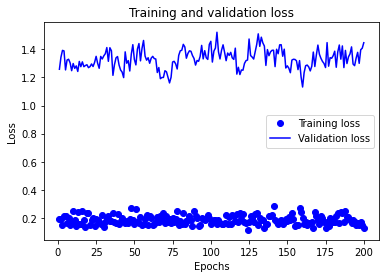

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

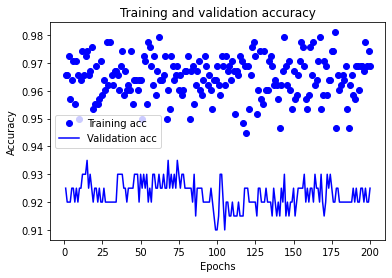

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
model.evaluate(test_features, one_hot_test_labels)

7/7 [==============================] - 0s 6ms/step - loss: 0.6084 - accuracy: 0.9385


[0.608418345451355, 0.9384615421295166]

In [15]:
X_test = test_df[['peak_1', 'peak_2', 'peak_3', 'peak_4', 'peak_5', 'peak_6']]
y_test = test_df['space_code']

In [34]:
measured_test_labels = to_categorical(y_test)
a_test_label = to_categorical(a_test_label)

In [81]:
model.evaluate(X_test.iloc[216:222], measured_test_labels[216:222]  )

1/1 [==============================] - 0s 30ms/step - loss: 21.7232 - accuracy: 0.0000e+00


[21.723230361938477, 0.0]

In [82]:
model.evaluate(X_test.iloc[369:375], measured_test_labels[369:375] )

1/1 [==============================] - 0s 30ms/step - loss: 0.0596 - accuracy: 1.0000


[0.05956221744418144, 1.0]